In [1]:
3+6

9

# Master File

# Tools & Libraries

In [2]:
# make imports from pa_lib possible (parent directory of file's directory)
import sys
from pathlib import Path

file_dir = Path.cwd()
print(file_dir)
parent_dir = file_dir.parent
print(parent_dir)
sys.path.append(str(parent_dir))

C:\Users\stc\Documents\GitHub\PredictiveAnalyticsPython\vkprog_analyse
C:\Users\stc\Documents\GitHub\PredictiveAnalyticsPython


In [3]:
%load_ext autoreload
%autoreload
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pa_lib.data import (boxplot_histogram)

from pa_lib.file import (
    project_dir,
    load_bin,
    load_csv,
    load_xlsx,
    store_bin
    )


In [4]:
from pa_lib.data import desc_col

In [5]:
from IPython.display import display
pd.options.display.max_columns = None


In [10]:
# Lazy Recursive Job Dependency Request:
from pa_lib.job import request_job

################################################################################
## Recursive Dependency Check:
request_job(job_name="ek_info_prepare.py", current= "This Week") 
# output: ek_info.feather

13:15:00 [INFO] [ipykernel_launcher.py] requests 'ek_info_prepare.py'
13:15:00 [INFO] [ipykernel_launcher.py]: Not running job 'ek_info_prepare.py': result is current ('This Week') from 2019-11-11 13:12:48.155551.


# Load Dataset (Data Preparation)

In [11]:
from vkprog_data_prep import bd_train_scoring


13:15:14 [INFO] [ipykernel_launcher.py] requests 'bd_prepare.py'
13:15:14 [INFO] [ipykernel_launcher.py]: Not running job 'bd_prepare.py': result is current ('Today') from 2019-11-11 12:29:31.755445.


http://www.whatweekisit.org/

In [17]:
%%time
# Wall time: 38.5 s

# 2019-10-21 => Calendar week 43
(training_all, scoring_all,
    feature_colnames_bd, feature_colnames_dates, feature_colnames_branchen
    ) = bd_train_scoring(
        day            = 18,
        month          = 11,
        year_score     = 2019,
        year_train     = 2018,
        year_span      = 4,
        sales_filter   = False,
        ## FYI: Keine Langzeitverträge, Eigenwerbung, Logistik für Dritte, politisch... etc.
        scale_features = True
        )

13:25:00 [INFO] Started loading binary file
13:25:00 [INFO] Reading from file C:\Users\stc\data\vkprog\bd_data.feather
13:25:01 [INFO] Finished loading binary file in 0.17s (0.86s CPU)
13:25:02 [INFO] False: Filters applied, defined by Sales
13:25:02 [INFO] Period: KW_2
13:25:02 [INFO] Calculate Reservation...
13:25:02 [INFO] Calculate Aushang...
13:25:02 [INFO] Merge Results...
13:25:03 [INFO] aggregate_bookings: Done.
13:25:03 [INFO] current_yyyykw: 201947
13:25:03 [INFO] training_yyyykw:201847
13:25:03 [INFO] Computing: Pivot Table
13:25:03 [INFO] Running: booking_yearly_totals(YYYYKW, year_span) 
13:25:03 [INFO] Final merge
13:25:04 [INFO] Computing: Pivot Table
13:25:04 [INFO] Running: booking_yearly_totals(YYYYKW, year_span) 
13:25:04 [INFO] Final merge
13:25:32 [INFO] Scaling features
13:25:35 [INFO] Finished.
Wall time: 34.3 s


In [14]:
print("\ntraining_all\n")
display(training_all.describe())
print("\nscoring_all\n")
display(scoring_all.describe())


training_all



,Endkunde_NR,Erste_Buchung_Delta,Letzte_Buchung_Delta,Erste_Letzte_Buchung_Delta,Netto_Sum_Aus_RY_0_KW_1,Netto_Sum_Aus_RY_0_KW_11,Netto_Sum_Aus_RY_0_KW_13,Netto_Sum_Aus_RY_0_KW_15,Netto_Sum_Aus_RY_0_KW_17,Netto_Sum_Aus_RY_0_KW_19,Netto_Sum_Aus_RY_0_KW_21,Netto_Sum_Aus_RY_0_KW_23,Netto_Sum_Aus_RY_0_KW_25,Netto_Sum_Aus_RY_0_KW_3,Netto_Sum_Aus_RY_0_KW_5,Netto_Sum_Aus_RY_0_KW_7,Netto_Sum_Aus_RY_0_KW_9,Netto_Sum_Aus_RY_1_KW_1,Netto_Sum_Aus_RY_1_KW_11,Netto_Sum_Aus_RY_1_KW_13,Netto_Sum_Aus_RY_1_KW_15,Netto_Sum_Aus_RY_1_KW_17,Netto_Sum_Aus_RY_1_KW_19,Netto_Sum_Aus_RY_1_KW_21,Netto_Sum_Aus_RY_1_KW_23,Netto_Sum_Aus_RY_1_KW_25,Netto_Sum_Aus_RY_1_KW_27,Netto_Sum_Aus_RY_1_KW_29,Netto_Sum_Aus_RY_1_KW_3,Netto_Sum_Aus_RY_1_KW_31,Netto_Sum_Aus_RY_1_KW_33,Netto_Sum_Aus_RY_1_KW_35,Netto_Sum_Aus_RY_1_KW_37,Netto_Sum_Aus_RY_1_KW_39,Netto_Sum_Aus_RY_1_KW_41,Netto_Sum_Aus_RY_1_KW_43,Netto_Sum_Aus_RY_1_KW_45,Netto_Sum_Aus_RY_1_KW_47,Netto_Sum_Aus_RY_1_KW_49,Netto_Sum_Aus_RY_1_KW_5,Netto_Sum_Aus_RY_1_KW_51,Netto_Sum_Aus_RY_1_KW_7,Netto_Sum_Aus_RY_1_KW_9,Netto_Sum_Aus_RY_2_KW_1,Netto_Sum_Aus_RY_2_KW_11,Netto_Sum_Aus_RY_2_KW_13,Netto_Sum_Aus_RY_2_KW_15,Netto_Sum_Aus_RY_2_KW_17,Netto_Sum_Aus_RY_2_KW_19,Netto_Sum_Aus_RY_2_KW_21,Netto_Sum_Aus_RY_2_KW_23,Netto_Sum_Aus_RY_2_KW_25,Netto_Sum_Aus_RY_2_KW_27,Netto_Sum_Aus_RY_2_KW_29,Netto_Sum_Aus_RY_2_KW_3,Netto_Sum_Aus_RY_2_KW_31,Netto_Sum_Aus_RY_2_KW_33,Netto_Sum_Aus_RY_2_KW_35,Netto_Sum_Aus_RY_2_KW_37,Netto_Sum_Aus_RY_2_KW_39,Netto_Sum_Aus_RY_2_KW_41,Netto_Sum_Aus_RY_2_KW_43,Netto_Sum_Aus_RY_2_KW_45,Netto_Sum_Aus_RY_2_KW_47,Netto_Sum_Aus_RY_2_KW_49,Netto_Sum_Aus_RY_2_KW_5,Netto_Sum_Aus_RY_2_KW_51,Netto_Sum_Aus_RY_2_KW_7,Netto_Sum_Aus_RY_2_KW_9,Netto_Sum_Aus_RY_3_KW_1,Netto_Sum_Aus_RY_3_KW_11,Netto_Sum_Aus_RY_3_KW_13,Netto_Sum_Aus_RY_3_KW_15,Netto_Sum_Aus_RY_3_KW_17,Netto_Sum_Aus_RY_3_KW_19,Netto_Sum_Aus_RY_3_KW_21,Netto_Sum_Aus_RY_3_KW_23,Netto_Sum_Aus_RY_3_KW_25,Netto_Sum_Aus_RY_3_KW_27,Netto_Sum_Aus_RY_3_KW_29,Netto_Sum_Aus_RY_3_KW_3,Netto_Sum_Aus_RY_3_KW_31,Netto_Sum_Aus_RY_3_KW_33,Netto_Sum_Aus_RY_3_KW_35,Netto_Sum_Aus_RY_3_KW_37,Netto_Sum_Aus_RY_3_KW_39,Netto_Sum_Aus_RY_3_KW_41,Netto_Sum_Aus_RY_3_KW_43,Netto_Sum_Aus_RY_3_KW_45,Netto_Sum_Aus_RY_3_KW_47,Netto_Sum_Aus_RY_3_KW_49,Netto_Sum_Aus_RY_3_KW_5,Netto_Sum_Aus_RY_3_KW_51,Netto_Sum_Aus_RY_3_KW_7,Netto_Sum_Aus_RY_3_KW_9,Netto_Sum_Aus_RY_4_KW_27,Netto_Sum_Aus_RY_4_KW_29,Netto_Sum_Aus_RY_4_KW_31,Netto_Sum_Aus_RY_4_KW_33,Netto_Sum_Aus_RY_4_KW_35,Netto_Sum_Aus_RY_4_KW_37,Netto_Sum_Aus_RY_4_KW_39,Netto_Sum_Aus_RY_4_KW_41,Netto_Sum_Aus_RY_4_KW_43,Netto_Sum_Aus_RY_4_KW_45,Netto_Sum_Aus_RY_4_KW_47,Netto_Sum_Aus_RY_4_KW_49,Netto_Sum_Aus_RY_4_KW_51,Netto_Sum_Res_RY_0_KW_1,Netto_Sum_Res_RY_0_KW_11,Netto_Sum_Res_RY_0_KW_13,Netto_Sum_Res_RY_0_KW_15,Netto_Sum_Res_RY_0_KW_17,Netto_Sum_Res_RY_0_KW_19,Netto_Sum_Res_RY_0_KW_21,Netto_Sum_Res_RY_0_KW_23,Netto_Sum_Res_RY_0_KW_25,Netto_Sum_Res_RY_0_KW_3,Netto_Sum_Res_RY_0_KW_5,Netto_Sum_Res_RY_0_KW_7,Netto_Sum_Res_RY_0_KW_9,Netto_Sum_Res_RY_1_KW_1,Netto_Sum_Res_RY_1_KW_11,Netto_Sum_Res_RY_1_KW_13,Netto_Sum_Res_RY_1_KW_15,Netto_Sum_Res_RY_1_KW_17,Netto_Sum_Res_RY_1_KW_19,Netto_Sum_Res_RY_1_KW_21,Netto_Sum_Res_RY_1_KW_23,Netto_Sum_Res_RY_1_KW_25,Netto_Sum_Res_RY_1_KW_27,Netto_Sum_Res_RY_1_KW_29,Netto_Sum_Res_RY_1_KW_3,Netto_Sum_Res_RY_1_KW_31,Netto_Sum_Res_RY_1_KW_33,Netto_Sum_Res_RY_1_KW_35,Netto_Sum_Res_RY_1_KW_37,Netto_Sum_Res_RY_1_KW_39,Netto_Sum_Res_RY_1_KW_41,Netto_Sum_Res_RY_1_KW_43,Netto_Sum_Res_RY_1_KW_45,Netto_Sum_Res_RY_1_KW_47,Netto_Sum_Res_RY_1_KW_49,Netto_Sum_Res_RY_1_KW_5,Netto_Sum_Res_RY_1_KW_51,Netto_Sum_Res_RY_1_KW_7,Netto_Sum_Res_RY_1_KW_9,Netto_Sum_Res_RY_2_KW_1,Netto_Sum_Res_RY_2_KW_11,Netto_Sum_Res_RY_2_KW_13,Netto_Sum_Res_RY_2_KW_15,Netto_Sum_Res_RY_2_KW_17,Netto_Sum_Res_RY_2_KW_19,Netto_Sum_Res_RY_2_KW_21,Netto_Sum_Res_RY_2_KW_23,Netto_Sum_Res_RY_2_KW_25,Netto_Sum_Res_RY_2_KW_27,Netto_Sum_Res_RY_2_KW_29,Netto_Sum_Res_RY_2_KW_3,Netto_Sum_Res_RY_2_KW_31,Netto_Sum_Res_RY_2_KW_33,Netto_Sum_Res_RY_2_KW_35,N


scoring_all



,Endkunde_NR,Erste_Buchung_Delta,Letzte_Buchung_Delta,Erste_Letzte_Buchung_Delta,Netto_Sum_Aus_RY_0_KW_1,Netto_Sum_Aus_RY_0_KW_11,Netto_Sum_Aus_RY_0_KW_13,Netto_Sum_Aus_RY_0_KW_15,Netto_Sum_Aus_RY_0_KW_17,Netto_Sum_Aus_RY_0_KW_19,Netto_Sum_Aus_RY_0_KW_21,Netto_Sum_Aus_RY_0_KW_23,Netto_Sum_Aus_RY_0_KW_25,Netto_Sum_Aus_RY_0_KW_3,Netto_Sum_Aus_RY_0_KW_5,Netto_Sum_Aus_RY_0_KW_7,Netto_Sum_Aus_RY_0_KW_9,Netto_Sum_Aus_RY_1_KW_1,Netto_Sum_Aus_RY_1_KW_11,Netto_Sum_Aus_RY_1_KW_13,Netto_Sum_Aus_RY_1_KW_15,Netto_Sum_Aus_RY_1_KW_17,Netto_Sum_Aus_RY_1_KW_19,Netto_Sum_Aus_RY_1_KW_21,Netto_Sum_Aus_RY_1_KW_23,Netto_Sum_Aus_RY_1_KW_25,Netto_Sum_Aus_RY_1_KW_27,Netto_Sum_Aus_RY_1_KW_29,Netto_Sum_Aus_RY_1_KW_3,Netto_Sum_Aus_RY_1_KW_31,Netto_Sum_Aus_RY_1_KW_33,Netto_Sum_Aus_RY_1_KW_35,Netto_Sum_Aus_RY_1_KW_37,Netto_Sum_Aus_RY_1_KW_39,Netto_Sum_Aus_RY_1_KW_41,Netto_Sum_Aus_RY_1_KW_43,Netto_Sum_Aus_RY_1_KW_45,Netto_Sum_Aus_RY_1_KW_47,Netto_Sum_Aus_RY_1_KW_49,Netto_Sum_Aus_RY_1_KW_5,Netto_Sum_Aus_RY_1_KW_51,Netto_Sum_Aus_RY_1_KW_7,Netto_Sum_Aus_RY_1_KW_9,Netto_Sum_Aus_RY_2_KW_1,Netto_Sum_Aus_RY_2_KW_11,Netto_Sum_Aus_RY_2_KW_13,Netto_Sum_Aus_RY_2_KW_15,Netto_Sum_Aus_RY_2_KW_17,Netto_Sum_Aus_RY_2_KW_19,Netto_Sum_Aus_RY_2_KW_21,Netto_Sum_Aus_RY_2_KW_23,Netto_Sum_Aus_RY_2_KW_25,Netto_Sum_Aus_RY_2_KW_27,Netto_Sum_Aus_RY_2_KW_29,Netto_Sum_Aus_RY_2_KW_3,Netto_Sum_Aus_RY_2_KW_31,Netto_Sum_Aus_RY_2_KW_33,Netto_Sum_Aus_RY_2_KW_35,Netto_Sum_Aus_RY_2_KW_37,Netto_Sum_Aus_RY_2_KW_39,Netto_Sum_Aus_RY_2_KW_41,Netto_Sum_Aus_RY_2_KW_43,Netto_Sum_Aus_RY_2_KW_45,Netto_Sum_Aus_RY_2_KW_47,Netto_Sum_Aus_RY_2_KW_49,Netto_Sum_Aus_RY_2_KW_5,Netto_Sum_Aus_RY_2_KW_51,Netto_Sum_Aus_RY_2_KW_7,Netto_Sum_Aus_RY_2_KW_9,Netto_Sum_Aus_RY_3_KW_1,Netto_Sum_Aus_RY_3_KW_11,Netto_Sum_Aus_RY_3_KW_13,Netto_Sum_Aus_RY_3_KW_15,Netto_Sum_Aus_RY_3_KW_17,Netto_Sum_Aus_RY_3_KW_19,Netto_Sum_Aus_RY_3_KW_21,Netto_Sum_Aus_RY_3_KW_23,Netto_Sum_Aus_RY_3_KW_25,Netto_Sum_Aus_RY_3_KW_27,Netto_Sum_Aus_RY_3_KW_29,Netto_Sum_Aus_RY_3_KW_3,Netto_Sum_Aus_RY_3_KW_31,Netto_Sum_Aus_RY_3_KW_33,Netto_Sum_Aus_RY_3_KW_35,Netto_Sum_Aus_RY_3_KW_37,Netto_Sum_Aus_RY_3_KW_39,Netto_Sum_Aus_RY_3_KW_41,Netto_Sum_Aus_RY_3_KW_43,Netto_Sum_Aus_RY_3_KW_45,Netto_Sum_Aus_RY_3_KW_47,Netto_Sum_Aus_RY_3_KW_49,Netto_Sum_Aus_RY_3_KW_5,Netto_Sum_Aus_RY_3_KW_51,Netto_Sum_Aus_RY_3_KW_7,Netto_Sum_Aus_RY_3_KW_9,Netto_Sum_Aus_RY_4_KW_27,Netto_Sum_Aus_RY_4_KW_29,Netto_Sum_Aus_RY_4_KW_31,Netto_Sum_Aus_RY_4_KW_33,Netto_Sum_Aus_RY_4_KW_35,Netto_Sum_Aus_RY_4_KW_37,Netto_Sum_Aus_RY_4_KW_39,Netto_Sum_Aus_RY_4_KW_41,Netto_Sum_Aus_RY_4_KW_43,Netto_Sum_Aus_RY_4_KW_45,Netto_Sum_Aus_RY_4_KW_47,Netto_Sum_Aus_RY_4_KW_49,Netto_Sum_Aus_RY_4_KW_51,Netto_Sum_Res_RY_0_KW_1,Netto_Sum_Res_RY_0_KW_11,Netto_Sum_Res_RY_0_KW_13,Netto_Sum_Res_RY_0_KW_15,Netto_Sum_Res_RY_0_KW_17,Netto_Sum_Res_RY_0_KW_19,Netto_Sum_Res_RY_0_KW_21,Netto_Sum_Res_RY_0_KW_23,Netto_Sum_Res_RY_0_KW_25,Netto_Sum_Res_RY_0_KW_3,Netto_Sum_Res_RY_0_KW_5,Netto_Sum_Res_RY_0_KW_7,Netto_Sum_Res_RY_0_KW_9,Netto_Sum_Res_RY_1_KW_1,Netto_Sum_Res_RY_1_KW_11,Netto_Sum_Res_RY_1_KW_13,Netto_Sum_Res_RY_1_KW_15,Netto_Sum_Res_RY_1_KW_17,Netto_Sum_Res_RY_1_KW_19,Netto_Sum_Res_RY_1_KW_21,Netto_Sum_Res_RY_1_KW_23,Netto_Sum_Res_RY_1_KW_25,Netto_Sum_Res_RY_1_KW_27,Netto_Sum_Res_RY_1_KW_29,Netto_Sum_Res_RY_1_KW_3,Netto_Sum_Res_RY_1_KW_31,Netto_Sum_Res_RY_1_KW_33,Netto_Sum_Res_RY_1_KW_35,Netto_Sum_Res_RY_1_KW_37,Netto_Sum_Res_RY_1_KW_39,Netto_Sum_Res_RY_1_KW_41,Netto_Sum_Res_RY_1_KW_43,Netto_Sum_Res_RY_1_KW_45,Netto_Sum_Res_RY_1_KW_47,Netto_Sum_Res_RY_1_KW_49,Netto_Sum_Res_RY_1_KW_5,Netto_Sum_Res_RY_1_KW_51,Netto_Sum_Res_RY_1_KW_7,Netto_Sum_Res_RY_1_KW_9,Netto_Sum_Res_RY_2_KW_1,Netto_Sum_Res_RY_2_KW_11,Netto_Sum_Res_RY_2_KW_13,Netto_Sum_Res_RY_2_KW_15,Netto_Sum_Res_RY_2_KW_17,Netto_Sum_Res_RY_2_KW_19,Netto_Sum_Res_RY_2_KW_21,Netto_Sum_Res_RY_2_KW_23,Netto_Sum_Res_RY_2_KW_25,Netto_Sum_Res_RY_2_KW_27,Netto_Sum_Res_RY_2_KW_29,Netto_Sum_Res_RY_2_KW_3,Netto_Sum_Res_RY_2_KW_31,Netto_Sum_Res_RY_2_KW_33,Netto_Sum_Res_RY_2_KW_35,N

In [15]:
set(training_all.columns == scoring_all.columns)

{True}

In [16]:
# Search for NULLS
display(desc_col(training_all)
        .sort_values("NULLS", ascending=False)
        .head(5)
        )

display(desc_col(scoring_all)
        .sort_values("NULLS", ascending=False)
        .head(5)
       )

,DTYPE,NULLS,UNIQUE
Endkunde_NR,int64,0/18518,18518
Netto_Sum_Res_RY_4_KW_33,float64,0/18518,361
Netto_Sum_Res_RY_4_KW_47,float64,0/18518,379
Netto_Sum_Res_RY_4_KW_45,float64,0/18518,443
Netto_Sum_Res_RY_4_KW_43,float64,0/18518,552


,DTYPE,NULLS,UNIQUE
Endkunde_NR,int64,0/18551,18551
Netto_Sum_Res_RY_4_KW_33,float64,0/18551,347
Netto_Sum_Res_RY_4_KW_47,float64,0/18551,393
Netto_Sum_Res_RY_4_KW_45,float64,0/18551,412
Netto_Sum_Res_RY_4_KW_43,float64,0/18551,536


In [ ]:
#desc_col(training_all.loc[:,feature_colnames_branchen])
#desc_col(scoring_all.loc[:,feature_colnames_branchen])

Target_Res_flg == False


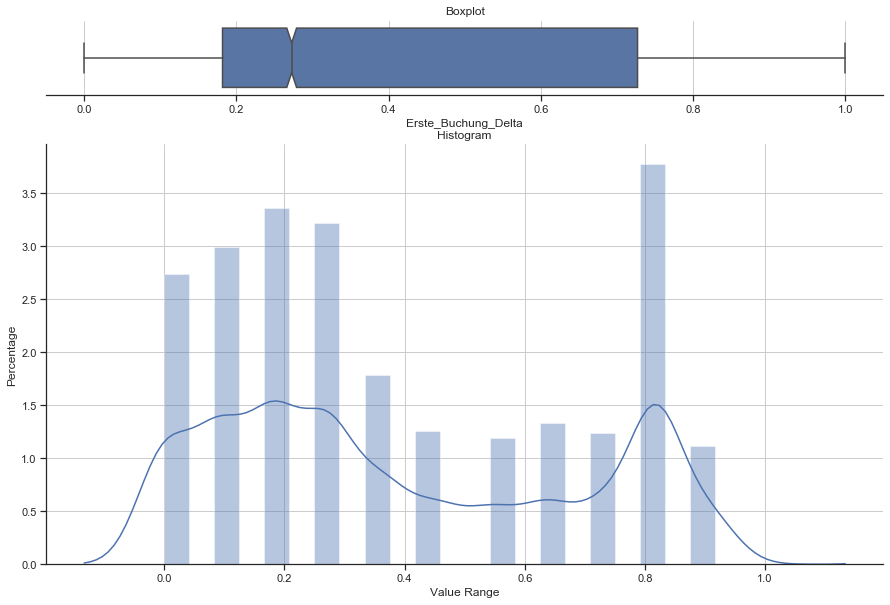

Target_Res_flg == True


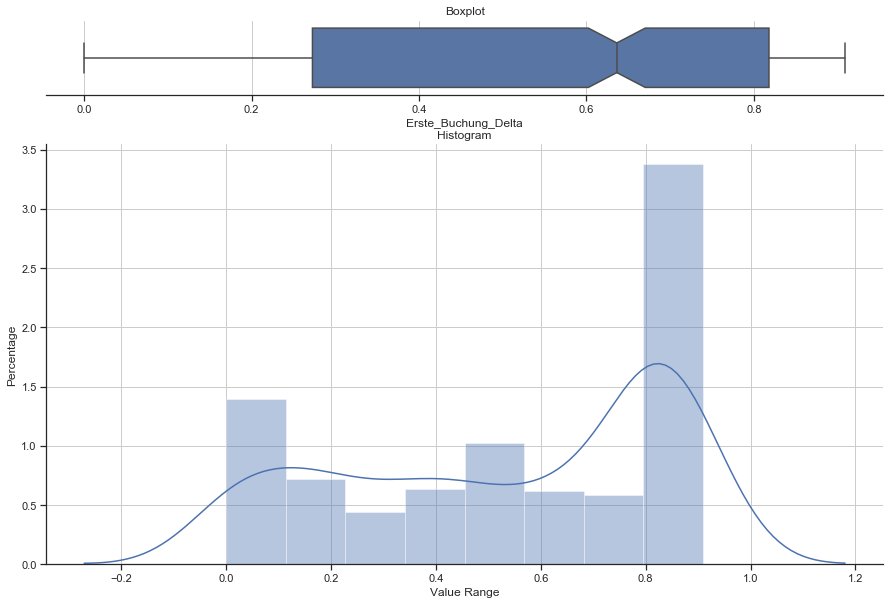

Target_Res_flg == False


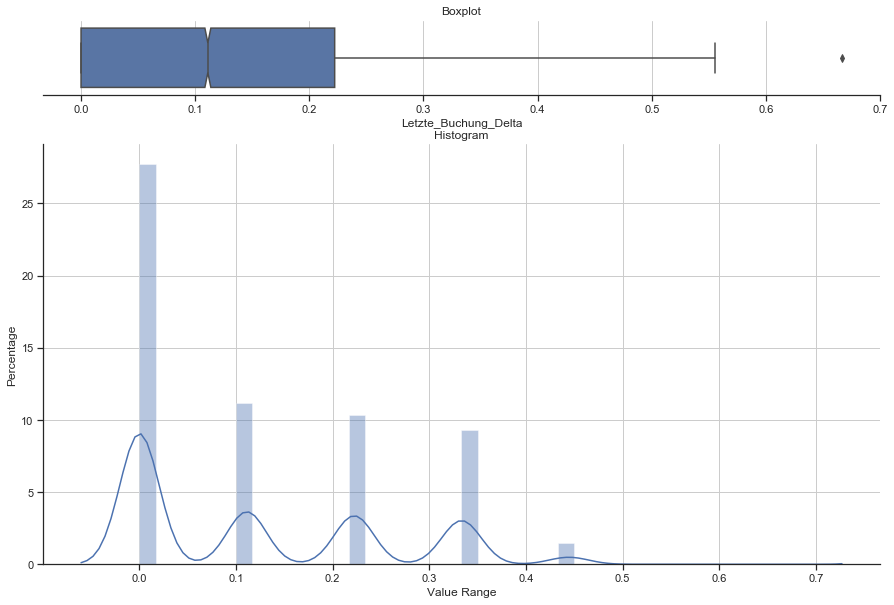

Target_Res_flg == True


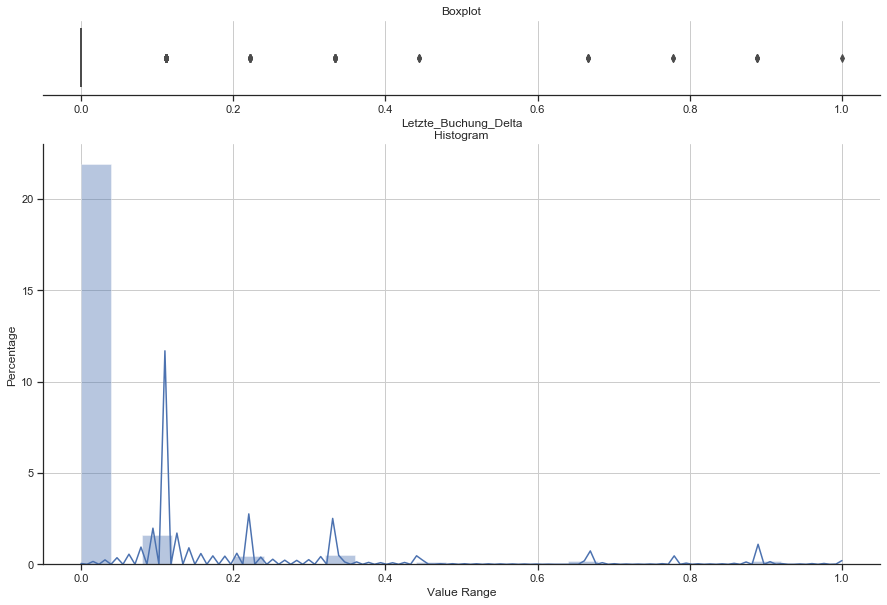

Target_Res_flg == False


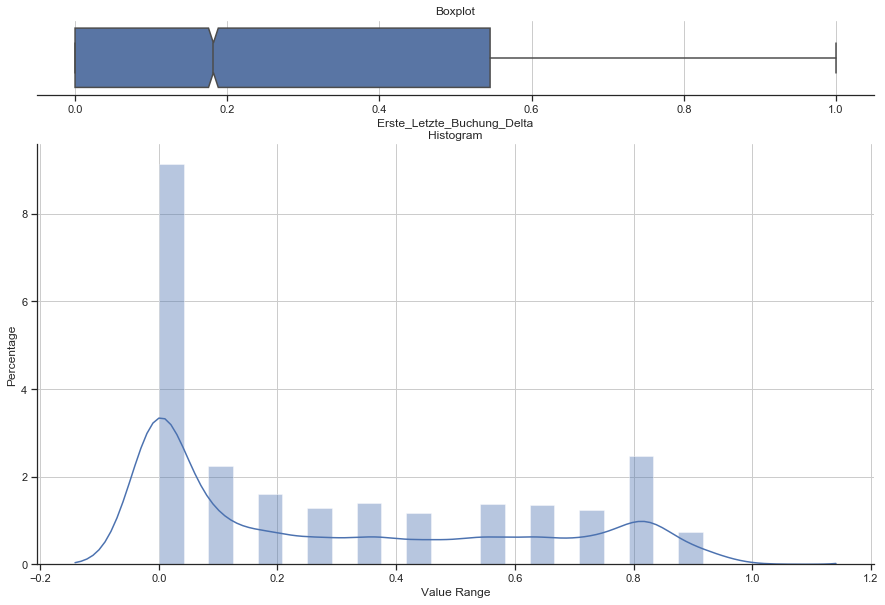

Target_Res_flg == True


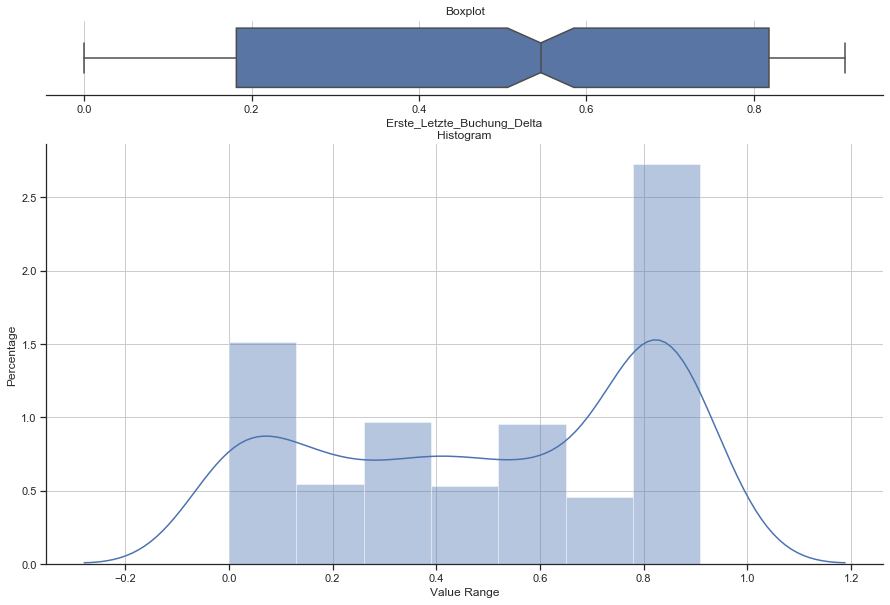

In [18]:
temp_df = training_all
print("Target_Res_flg == False")
boxplot_histogram(temp_df.loc[ temp_df.Target_Res_flg == False ,"Erste_Buchung_Delta"])
print("Target_Res_flg == True")
boxplot_histogram(temp_df.loc[ temp_df.Target_Res_flg == True ,"Erste_Buchung_Delta"])

print("Target_Res_flg == False")
boxplot_histogram(temp_df.loc[ temp_df.Target_Res_flg == False ,"Letzte_Buchung_Delta"])
print("Target_Res_flg == True")
boxplot_histogram(temp_df.loc[ temp_df.Target_Res_flg == True ,"Letzte_Buchung_Delta"])


print("Target_Res_flg == False")
boxplot_histogram(temp_df.loc[ temp_df.Target_Res_flg == False ,"Erste_Letzte_Buchung_Delta"])
print("Target_Res_flg == True")
boxplot_histogram(temp_df.loc[ temp_df.Target_Res_flg == True ,"Erste_Letzte_Buchung_Delta"])

## CRM Data

In [19]:
from vkprog_crm_prep  import crm_train_scoring

13:39:45 [INFO] [ipykernel_launcher.py] requests 'crm_prepare.py'
13:39:45 [INFO] [ipykernel_launcher.py]: Not running job 'crm_prepare.py': result is current ('Today') from 2019-11-11 11:54:31.791019.


In [20]:
(crm_train_df, crm_score_df,feature_colnames_crm) = crm_train_scoring(
    day        = 18,
    month      = 11,
    year_score = 2019,
    year_train = 2018,
    year_span  = 4
    )

13:40:47 [INFO] Start.
13:40:47 [INFO] Started loading binary file
13:40:47 [INFO] Reading from file C:\Users\stc\data\vkprog\crm_data_vkprog.feather
13:40:47 [INFO] Finished loading binary file in 0.22s (0.23s CPU)
13:40:58 [INFO] Finished.


In [21]:
from pa_lib.data import desc_col

In [22]:
def scaling_crm_add2master(master_df,crm_df,feature_colnames_crm):
    
    container_df = pd.merge(master_df, crm_df,how="left", on="Endkunde_NR")

    for col_name in list(np.compress(['RY'== x[0:2] for x in feature_colnames_crm],feature_colnames_crm)):
        container_df.loc[:,col_name] = container_df.loc[:,col_name].fillna(0)
        max_ = np.nanmax(container_df.loc[:,col_name])
        min_ = np.nanmin(container_df.loc[:,col_name])
        
        if min_ == max_:
            container_df.loc[:,col_name] = 0
        
        else:
            container_df.loc[:,col_name] = (container_df.loc[:,col_name] - min_)/(max_ - min_)

    for col_name in list(np.compress(['Letzter'== x[0:7] for x in feature_colnames_crm],feature_colnames_crm)):
        max_ = np.nanmax(container_df.loc[:,col_name]) # those who have never been contacted will be put together with the max-ones.
        container_df.loc[:,col_name] = container_df.loc[:,col_name].fillna(max_) # No more NaNs!
        min_ = np.nanmin(container_df.loc[:,col_name])
        
        if max_ == min_:
            container_df.loc[:,col_name] = 1
        else:
            container_df.loc[:,col_name] = container_df.loc[:,col_name]/max_ # scaling, doesn't need 0
    
    return container_df

In [23]:
training_all = scaling_crm_add2master(
    master_df            = training_all,
    crm_df               = crm_train_df,
    feature_colnames_crm = feature_colnames_crm
    )

In [24]:
scoring_all  = scaling_crm_add2master(
    master_df            = scoring_all,
    crm_df               = crm_score_df,
    feature_colnames_crm = feature_colnames_crm
    )

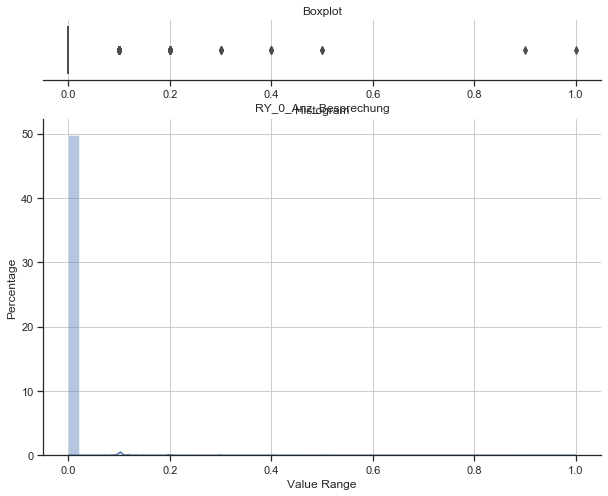

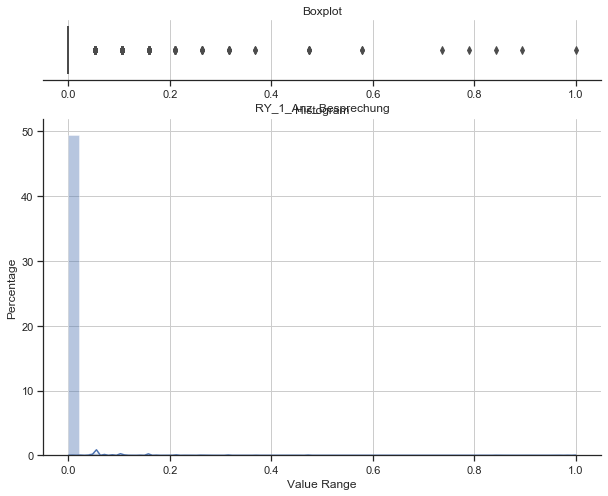

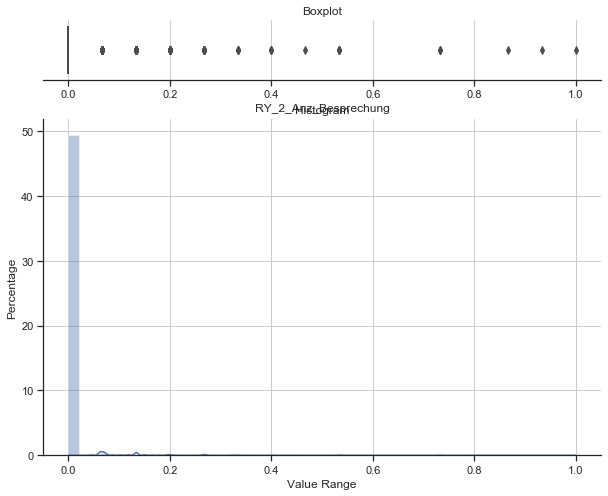

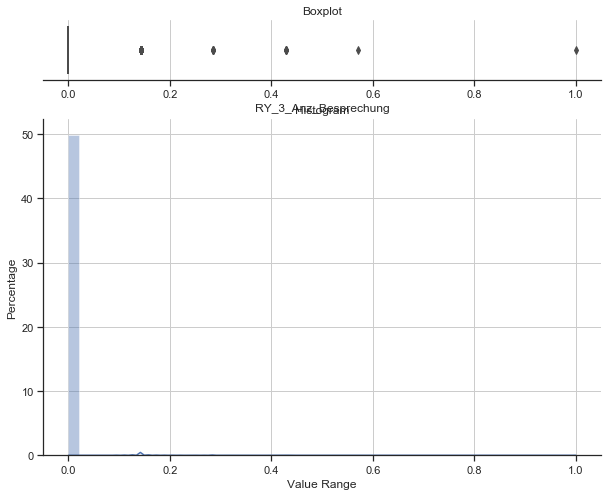

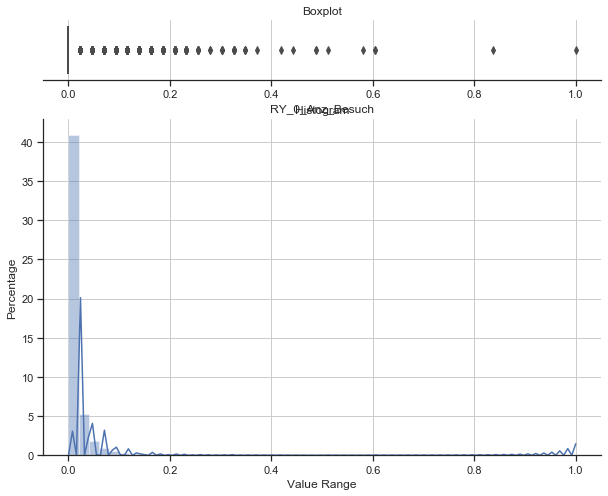

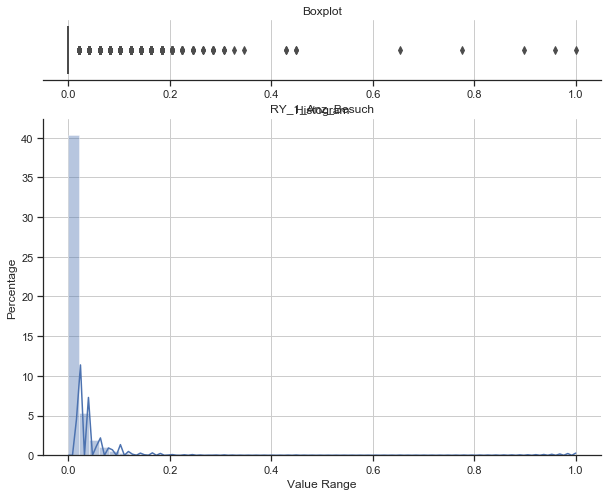

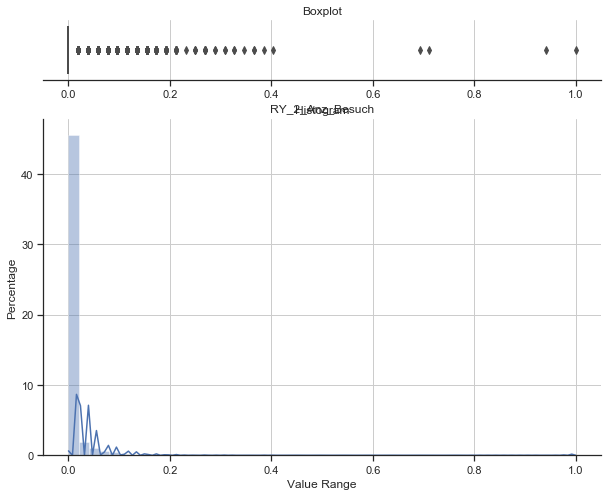

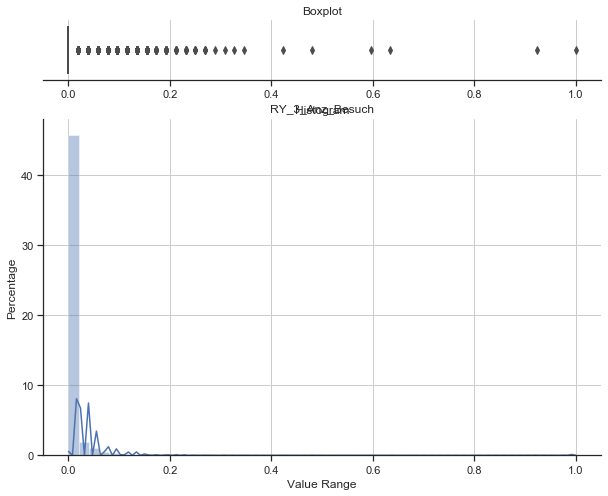

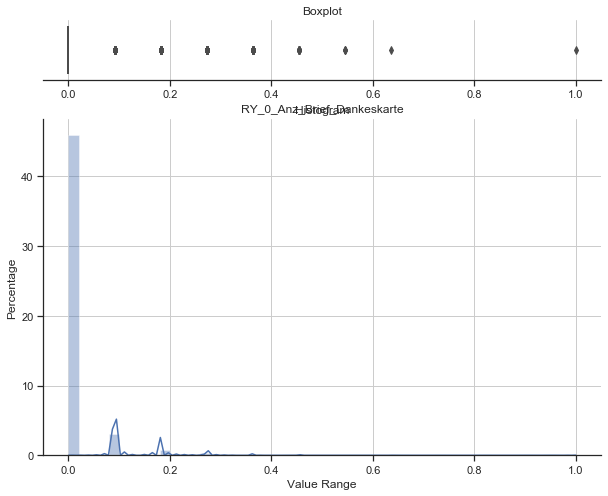

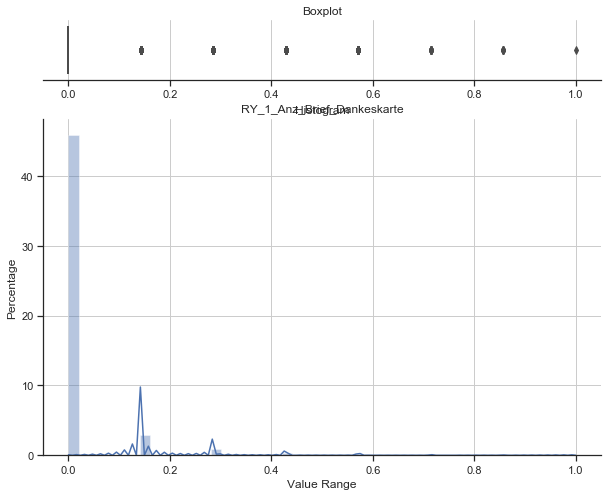

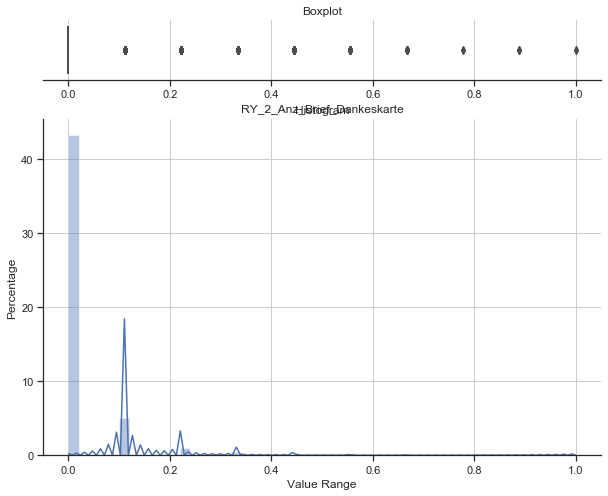

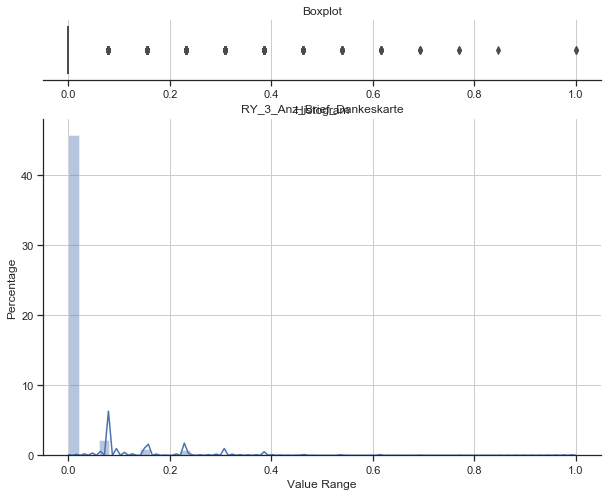

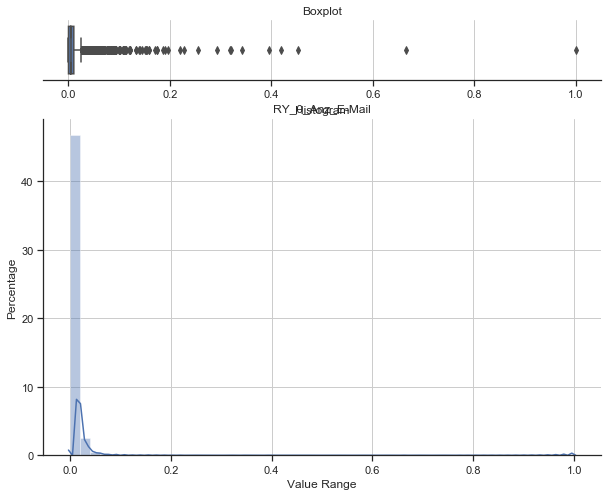

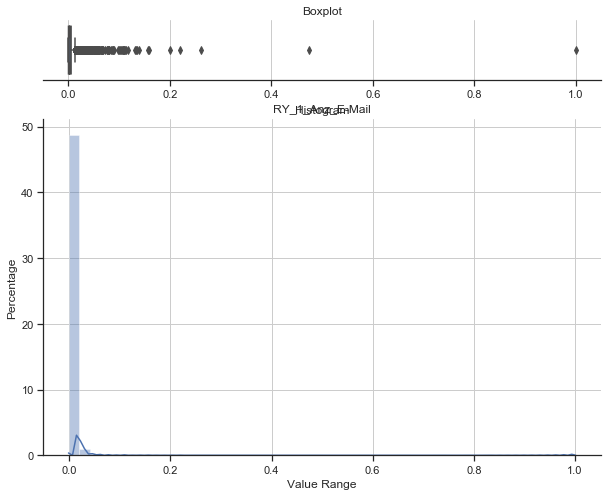

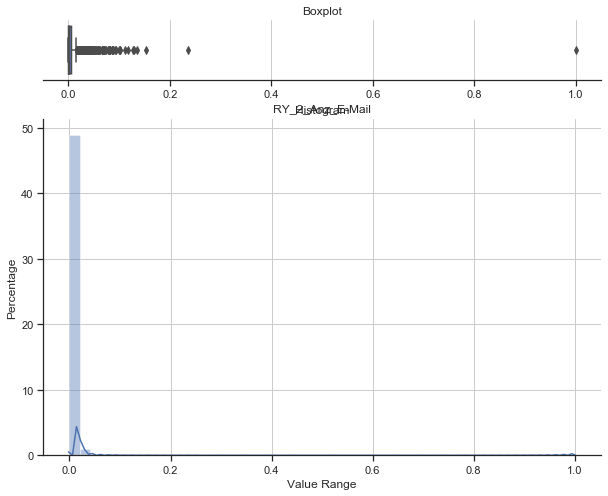

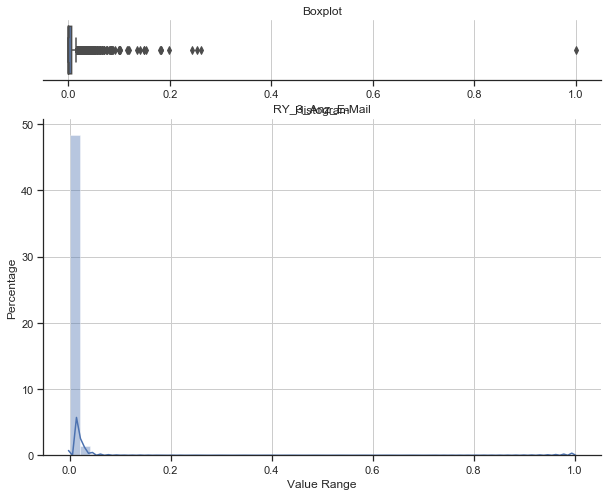

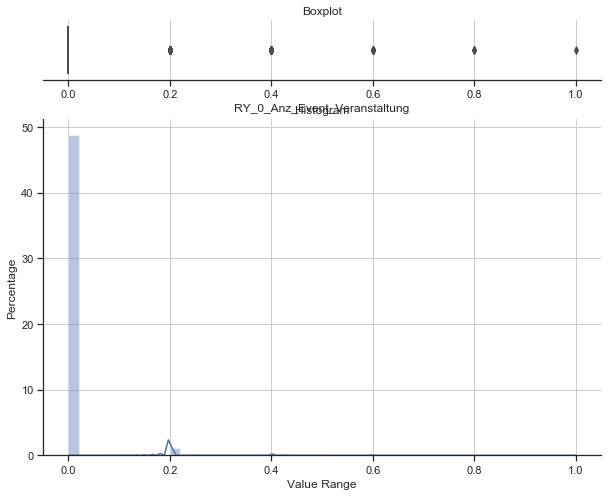

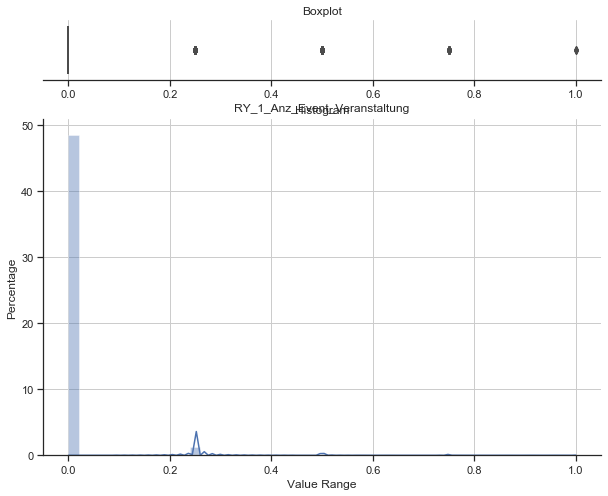

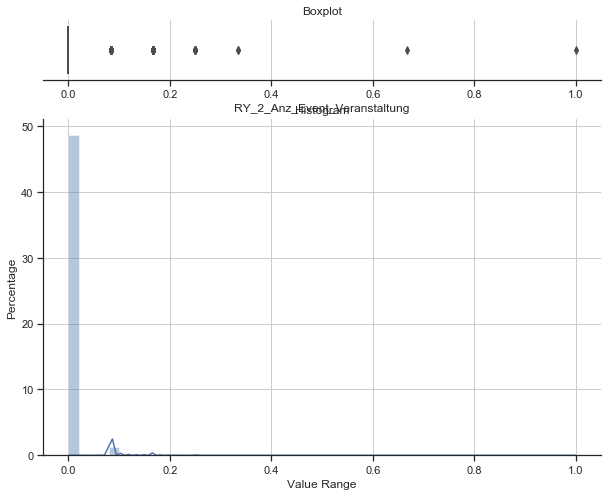

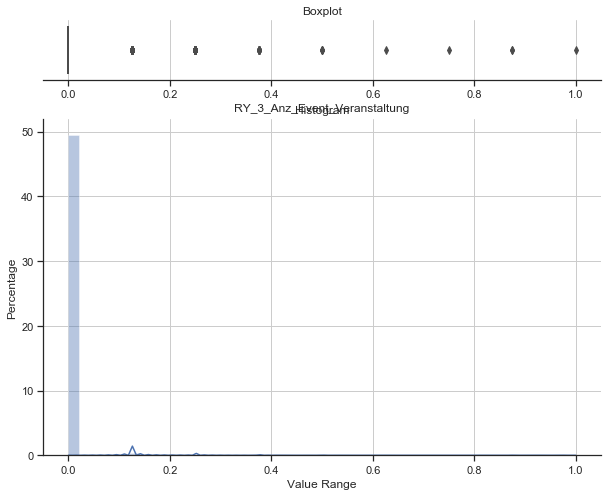

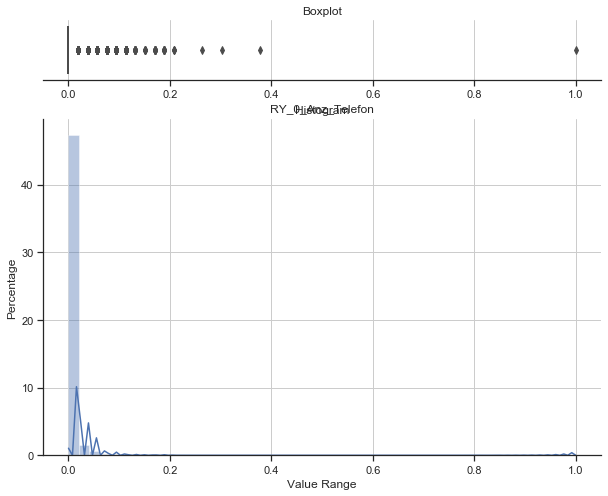

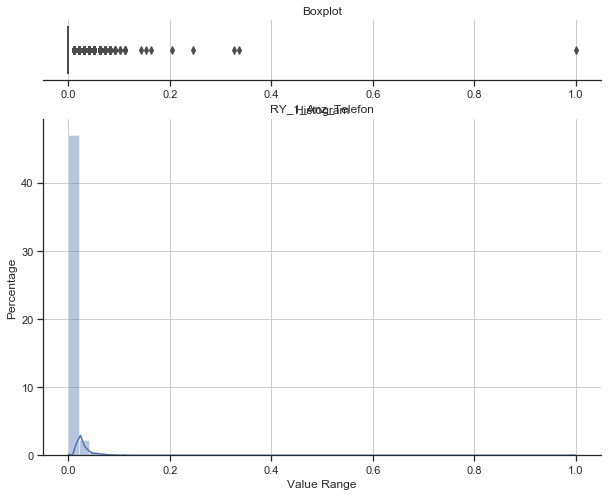

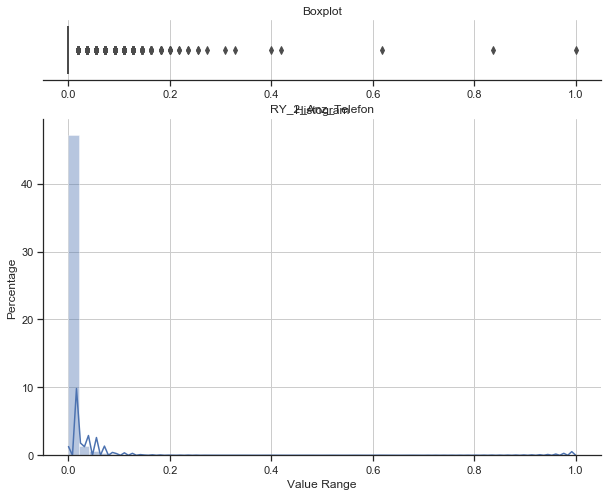

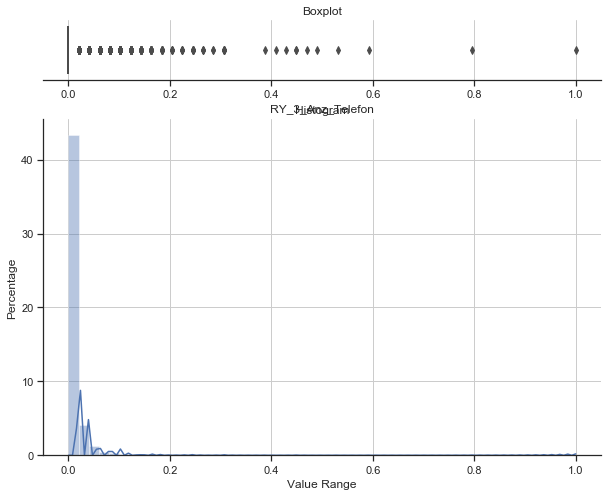

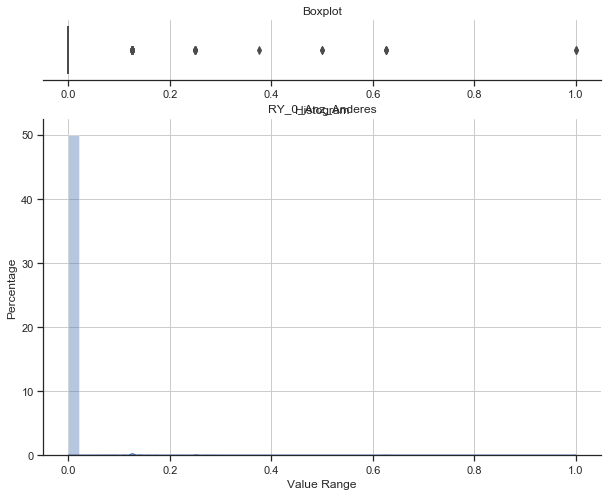

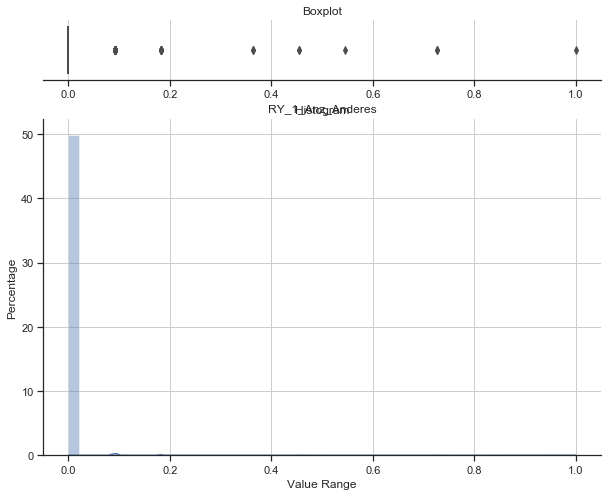

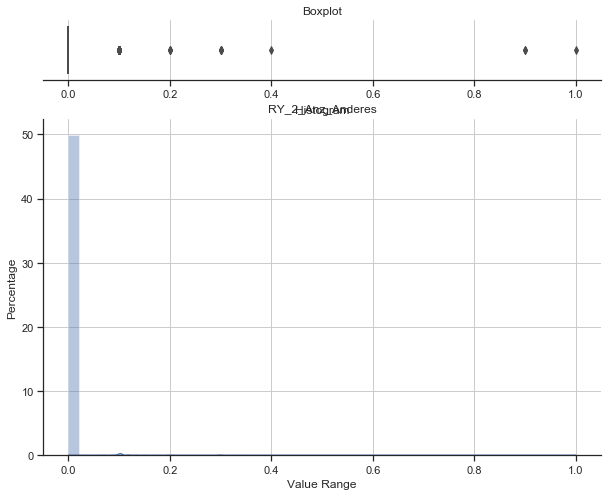

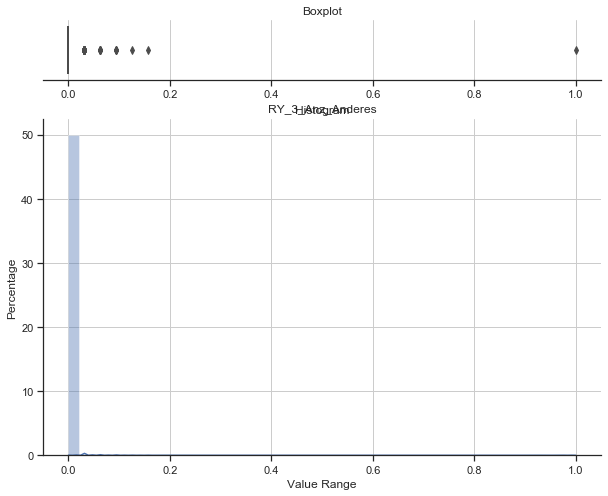

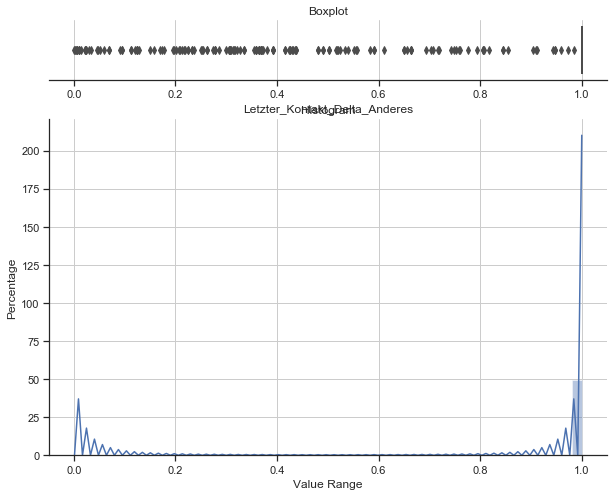

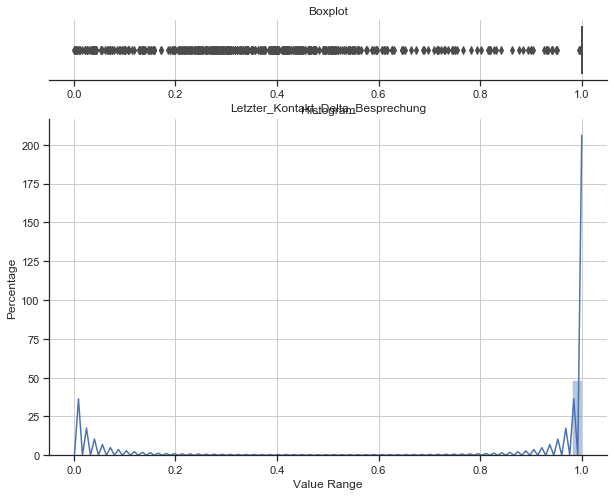

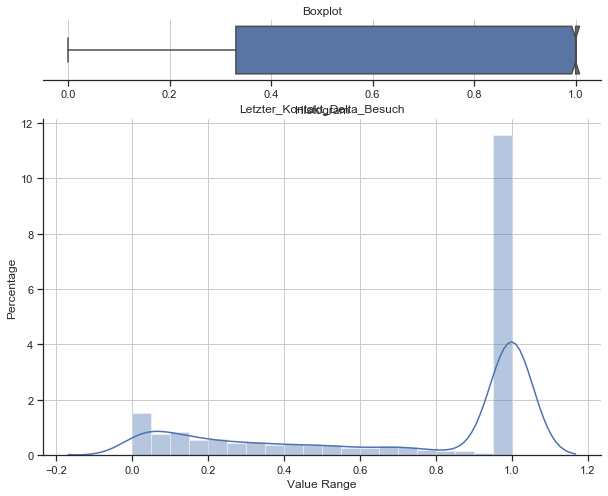

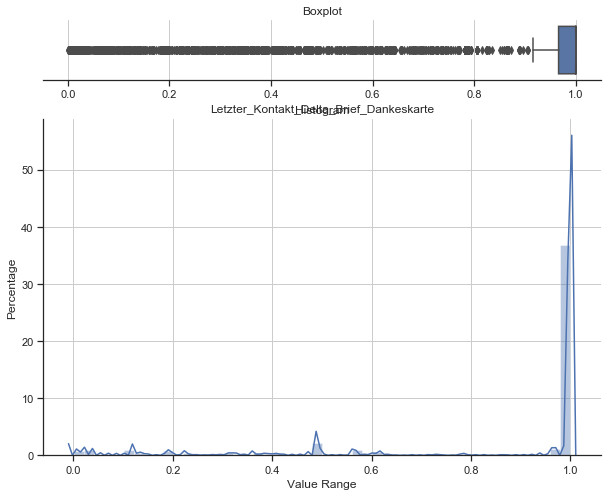

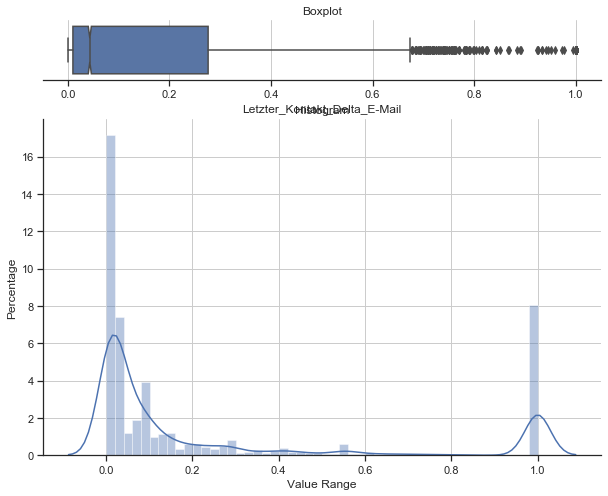

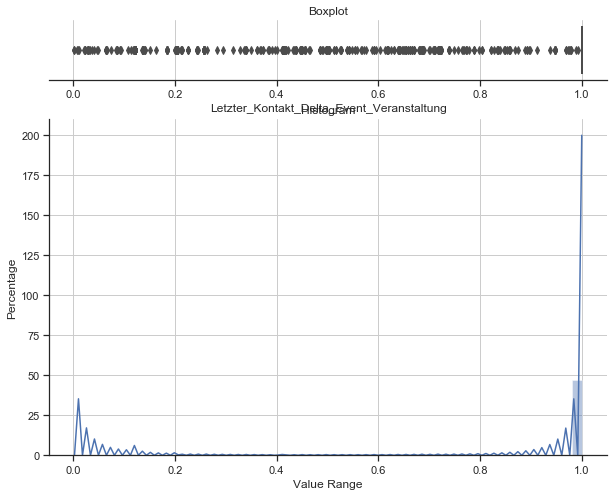

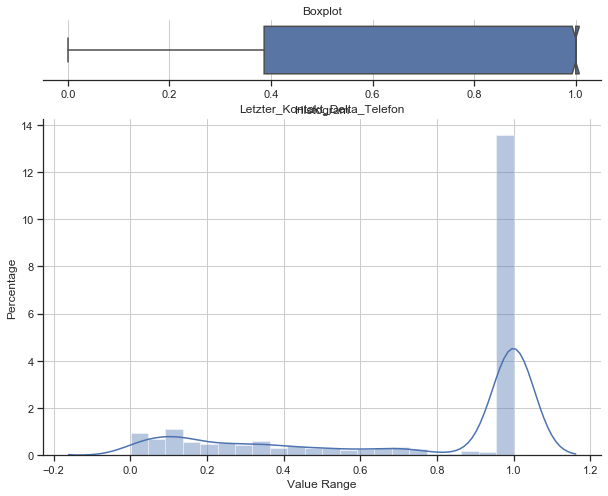

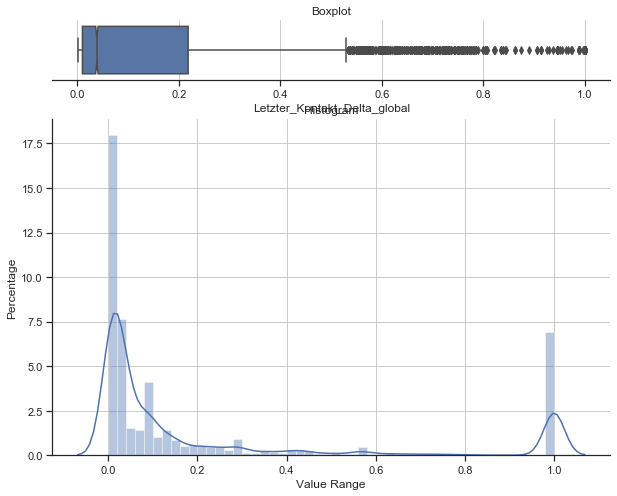

In [27]:
for x in feature_colnames_crm:
    boxplot_histogram(
        training_all.loc[:,x],
        figsize=(10,8)
        )

In [28]:
print(training_all.shape)
print(scoring_all.shape)

(18496, 345)
(18450, 345)


# Modeling

## Define Columns: Features versus Targets

In [37]:
from itertools import compress

features = (
    feature_colnames_bd         # Booking data
    + feature_colnames_dates    # Dates related to bookings
    + feature_colnames_branchen # Branches
    + feature_colnames_crm      # CRM (customer-vkber interactions)
    )


feature_columns_boolean = pd.Series(features).str.match('^Target')
feature_columns = pd.Series(features).loc[~feature_columns_boolean]

feature_columns_boolean = pd.Series(training_all.columns).str.match('^Target')
target_columns = pd.Series(training_all.columns).loc[feature_columns_boolean]

del feature_columns_boolean

In [38]:
print(f"Number of features:\n{len(feature_columns)}\n")
print(f"Target columns:\n{target_columns}")

Number of features:
338

Target columns:
214               Target_Aus_flg
215               Target_Res_flg
216    Target_Sum_Aus_RY_0_KW_47
217    Target_Sum_Res_RY_0_KW_47
dtype: object


## Split ``training_all`` into training-set (``X_train``,``y_train``) and test-set (``X_test``,``y_test``)

In [39]:
df_features = (
    training_all
    .loc[:,feature_columns]
    .to_numpy()
    )

df_target   = (
    training_all
    .loc[:, "Target_Res_flg"]
    .to_numpy()
    )

df_scoring_features = (
    scoring_all
    .loc[:,feature_columns]
    .to_numpy()
    )

In [42]:
print(f"df_features.shape: {df_features.shape}")
print(f"df_target.shape:   {df_target.shape}")

df_features.shape: (18496, 338)
df_target.shape:   (18496,)


In [43]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(
    df_features,
    df_target,
    train_size=0.75,
    random_state=42
    )

In [45]:
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape.:", X_test.shape)
print("y_test.shape:", y_test.shape)
print("\ndf_scoring_features.shape:", df_scoring_features.shape)

X_train.shape: (13872, 338)
y_train.shape: (13872,)
X_test.shape.: (4624, 338)
y_test.shape: (4624,)

df_scoring_features.shape: (18450, 338)


In [47]:
from scipy import stats
print('y_train:')
print(pd.DataFrame(y_train).groupby(0)[0].count())
print(stats.describe(y_train))

print('\ny_test:')
print(pd.DataFrame(y_test).groupby(0)[0].count())
print(list(stats.describe(y_test)))


y_train:
0
False    13395
True       477
Name: 0, dtype: int64
DescribeResult(nobs=13872, minmax=(False, True), mean=0.03438581314878893, variance=0.03320582273289797, skewness=5.110515757596382, kurtosis=24.117371308640926)

y_test:
0
False    4465
True      159
Name: 0, dtype: int64
[4624, (False, True), 0.03438581314878893, 0.0332106112284972, 5.110515757596384, 24.11737130864094]


## Balance Training Dataset

In [48]:
from imblearn.over_sampling import SMOTE
#ros = RandomOverSampler(random_state=42)
sm  = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

In [49]:
print('y_train_balanced:')
print(pd.DataFrame(y_train_balanced).groupby(0)[0].count())
print(stats.describe(y_train_balanced))

y_train_balanced:
0
False    13395
True     13395
Name: 0, dtype: int64
DescribeResult(nobs=26790, minmax=(False, True), mean=0.5, variance=0.25000933218858484, skewness=0.0, kurtosis=-2.0)


## Feature selection: SelectkBest

``SelectPercentile`` removes all but a user-specified highest scoring percentage of features.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html

In [54]:
from sklearn.feature_selection import (
    SelectKBest,
    f_classif,
    mutual_info_classif,
    #SelectPercentile
    )

from itertools import compress

In [55]:
%%time
#Wall time: 54 s

select = SelectKBest(
    score_func = mutual_info_classif,
    k          = 150 # How many features? (currently 219 is max)
    )

select.fit(
    X_train_balanced,
    y_train_balanced
    )

mask = select.get_support() # boolean array.

Wall time: 57.3 s


In [60]:
print(f"X_train_balanced.shape: {X_train_balanced.shape}")
print(f"X_train_balanced[:,mask].shape: {X_train_balanced[:,mask].shape}")

X_train_balanced.shape: (26790, 150)


IndexError: boolean index did not match indexed array along dimension 1; dimension is 150 but corresponding boolean dimension is 338

In [58]:
# Reassign variable names due to lazyness
feature_columns  = feature_columns.loc[mask]
X_train_balanced = X_train_balanced[:,mask]
X_train          = X_train[:,mask]
X_test           = X_test[:,mask]
X_scoring        = df_scoring_features[:,mask]

In [59]:
print("X_scoring.shape:",X_scoring.shape)

X_scoring.shape: (18450, 150)


## Model Training

### Logistic Regression (base model)

In [62]:
from sklearn.linear_model import LogisticRegression

In [64]:
%%time
# Wall time: 1min 13s
logreg_C1000 = LogisticRegression(
    n_jobs   = -1,
    solver   = "sag",
    max_iter = 100000,
    C        = 1000 #adjustable, bigger mean less restriction on coefficients
    ).fit(
        X_train_balanced,
        y_train_balanced
        ) # bigger C

print(f"Training set score: {logreg_C1000.score(X_train_balanced, y_train_balanced)}")
print(f"Test set score: {logreg_C1000.score(X_test, y_test)}")

Training set score: 0.834341172079134
Test set score: 0.8583477508650519
Wall time: 1min 21s


In [68]:
%%time
# Wall time: 543 ms
logreg_C0001 = LogisticRegression(
    n_jobs=-1,
    solver="sag",
    max_iter=100000,
    C=0.001 #adjustable, bigger mean less restriction on coefficients
    ).fit(
        X_train_balanced,
        y_train_balanced
        ) # bigger C

print(f"Training set score: {logreg_C0001.score(X_train_balanced,y_train_balanced)}")
print(f"Test set score:     {logreg_C0001.score(X_test, y_test)}")

Training set score: 0.7736095558044046
Test set score:     0.8745674740484429
Wall time: 437 ms


#### Plot Coefficients

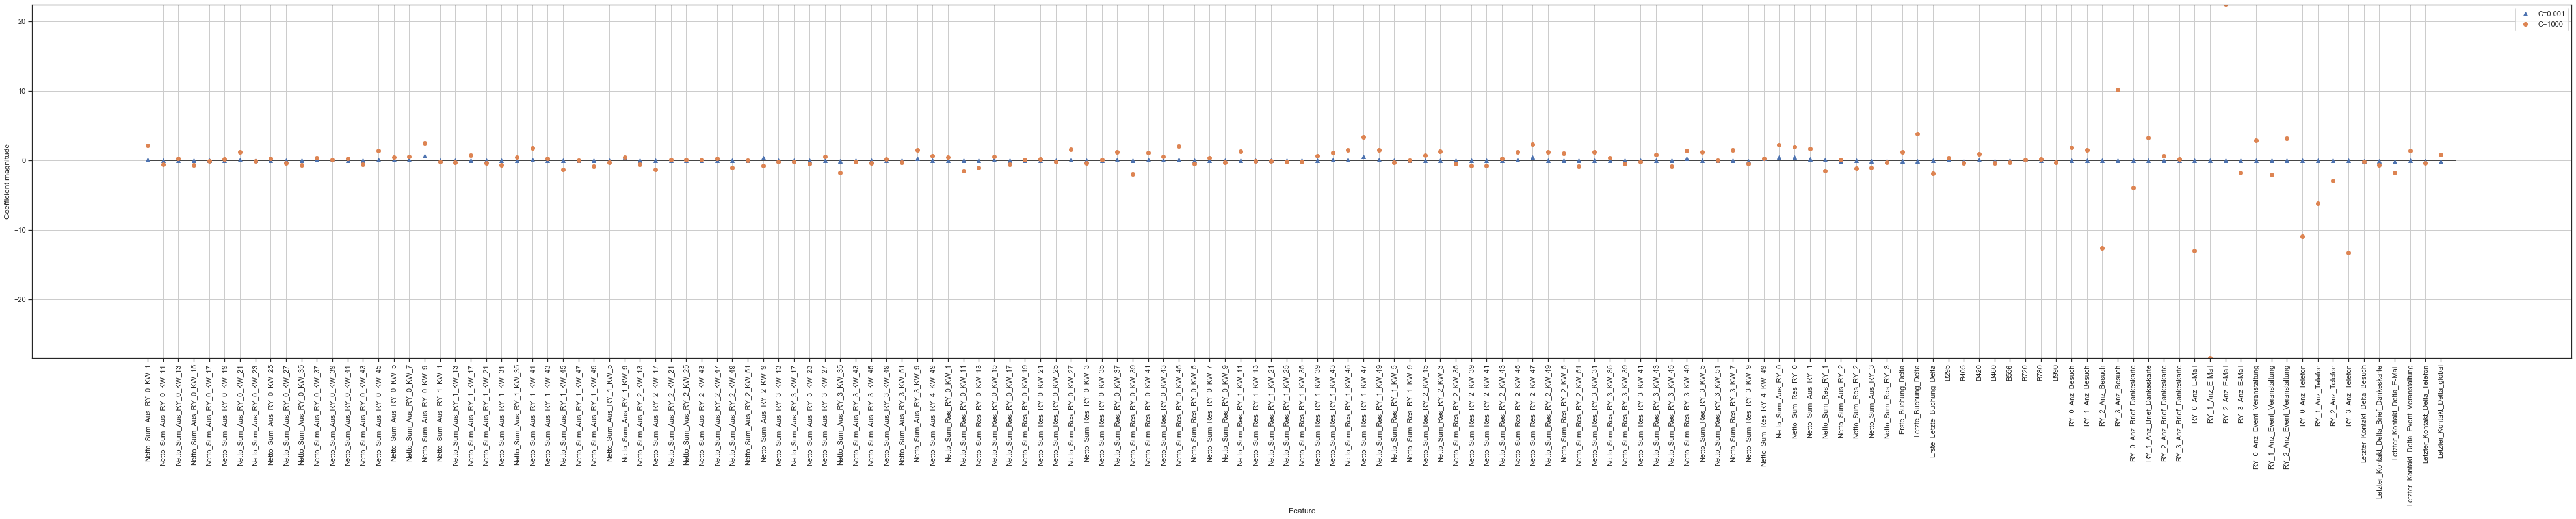

In [70]:
# %% Plot: Compare LogReg-coefficients for different C (1000, 0.001)
plt.figure(figsize=(70,10))

plt.grid()

plt.plot(logreg_C0001.coef_.T,
         '^',
         label="C=0.001"
        )

plt.plot(logreg_C1000.coef_.T,
         'o',
         label="C=1000"
        )

plt.xticks(range(len(feature_columns)),
           feature_columns,
           rotation=90
          )

plt.hlines(0, 0, len(feature_columns))

plt.ylim(min(logreg_C1000.coef_.T),
         max(logreg_C1000.coef_.T)
        )

plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('LogReg_Coefficient_Importance.png')

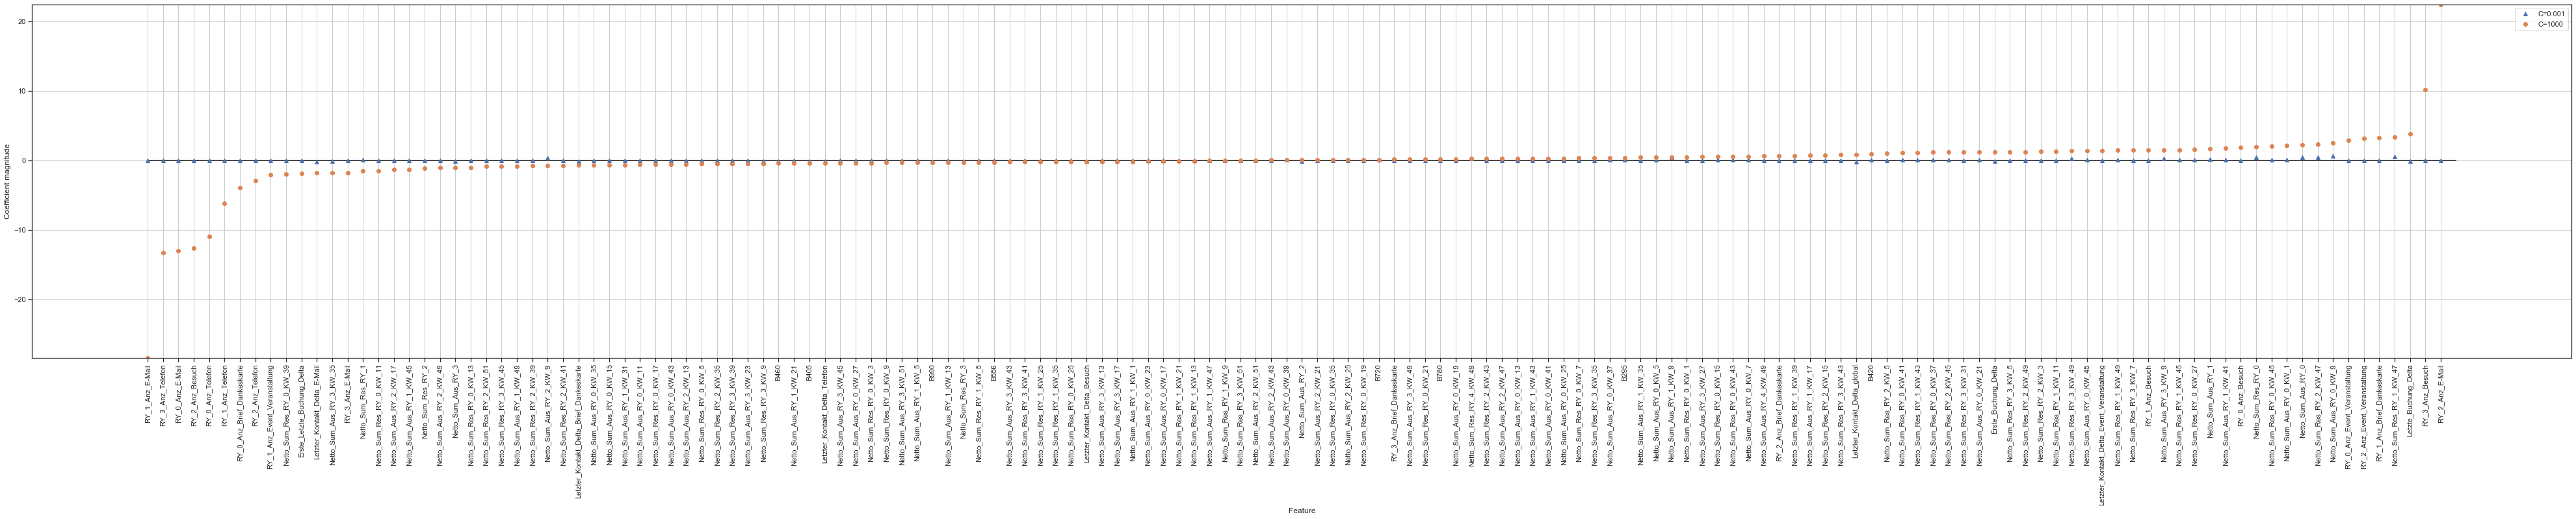

In [75]:
test_df = (
    pd.DataFrame(
        data={'feature': pd.Series(feature_columns), 
              'C1000':   list(logreg_C1000.coef_.T),
              'C0001':   list(logreg_C0001.coef_.T)}
    )
    .sort_values(by=['C1000'])
    .reset_index()
    )
    

# %% Plot: Compare LogReg-coefficients for different C (1000, 0.001)
plt.figure(figsize=(70,10))
plt.grid()
plt.plot(test_df.loc[:,'C0001'], '^', label="C=0.001")
plt.plot(test_df.loc[:,'C1000'], 'o', label="C=1000")
plt.xticks(range(len(feature_columns)), test_df.loc[:,'feature'], rotation=90)
plt.hlines(0, 0, len(feature_columns))
plt.ylim(min(logreg_C1000.coef_.T), max(logreg_C1000.coef_.T))
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('this_is_a_test.png')

### Model Training: Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
%%time 
# Wall time: 13min
forest_01 = RandomForestClassifier(
    n_estimators = 5*10**3,
    max_depth    = 10,
    criterion    = 'gini',  #criterion='gini',
    random_state = 42,
    n_jobs       = -1
    )

forest_01.fit(
    X_train_balanced,
    y_train_balanced
    )

Wall time: 24.9 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [78]:
%%time
# %% Validate Accuracy
print(f"Accuracy on balanced training set:   {forest_01.score(X_train_balanced, y_train_balanced)}")
print(f"Accuracy on unbalanced training set: {forest_01.score(X_train,          y_train)}")
print(f"Accuracy on test set (validation):   {forest_01.score(X_test,           y_test)}")

Accuracy on balanced training set:   0.9801045166106757
Accuracy on unbalanced training set: 0.984717416378316
Accuracy on test set (validation):   0.965181660899654
Wall time: 5.27 s


In [80]:
# %% Plot: Feature importance
def plot_feature_importances(
        model,
        feature_columns,
        figsize=(20,100)
        ):
    
    from operator import itemgetter
    
    dict_feature_importance = sorted(
        dict(
            zip(feature_columns,model.feature_importances_)
        ).items(),
        key=itemgetter(1)
        )
    
    n_features = len(feature_columns)
    
    plt.figure(figsize=figsize)
    plt.grid()
    
    plt.barh(
        np.arange(n_features),
        [y for (x,y) in dict_feature_importance],
        align='center'
        )
    
    plt.yticks(
        np.arange(n_features),
        [x for (x,y) in dict_feature_importance]
        )
    
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

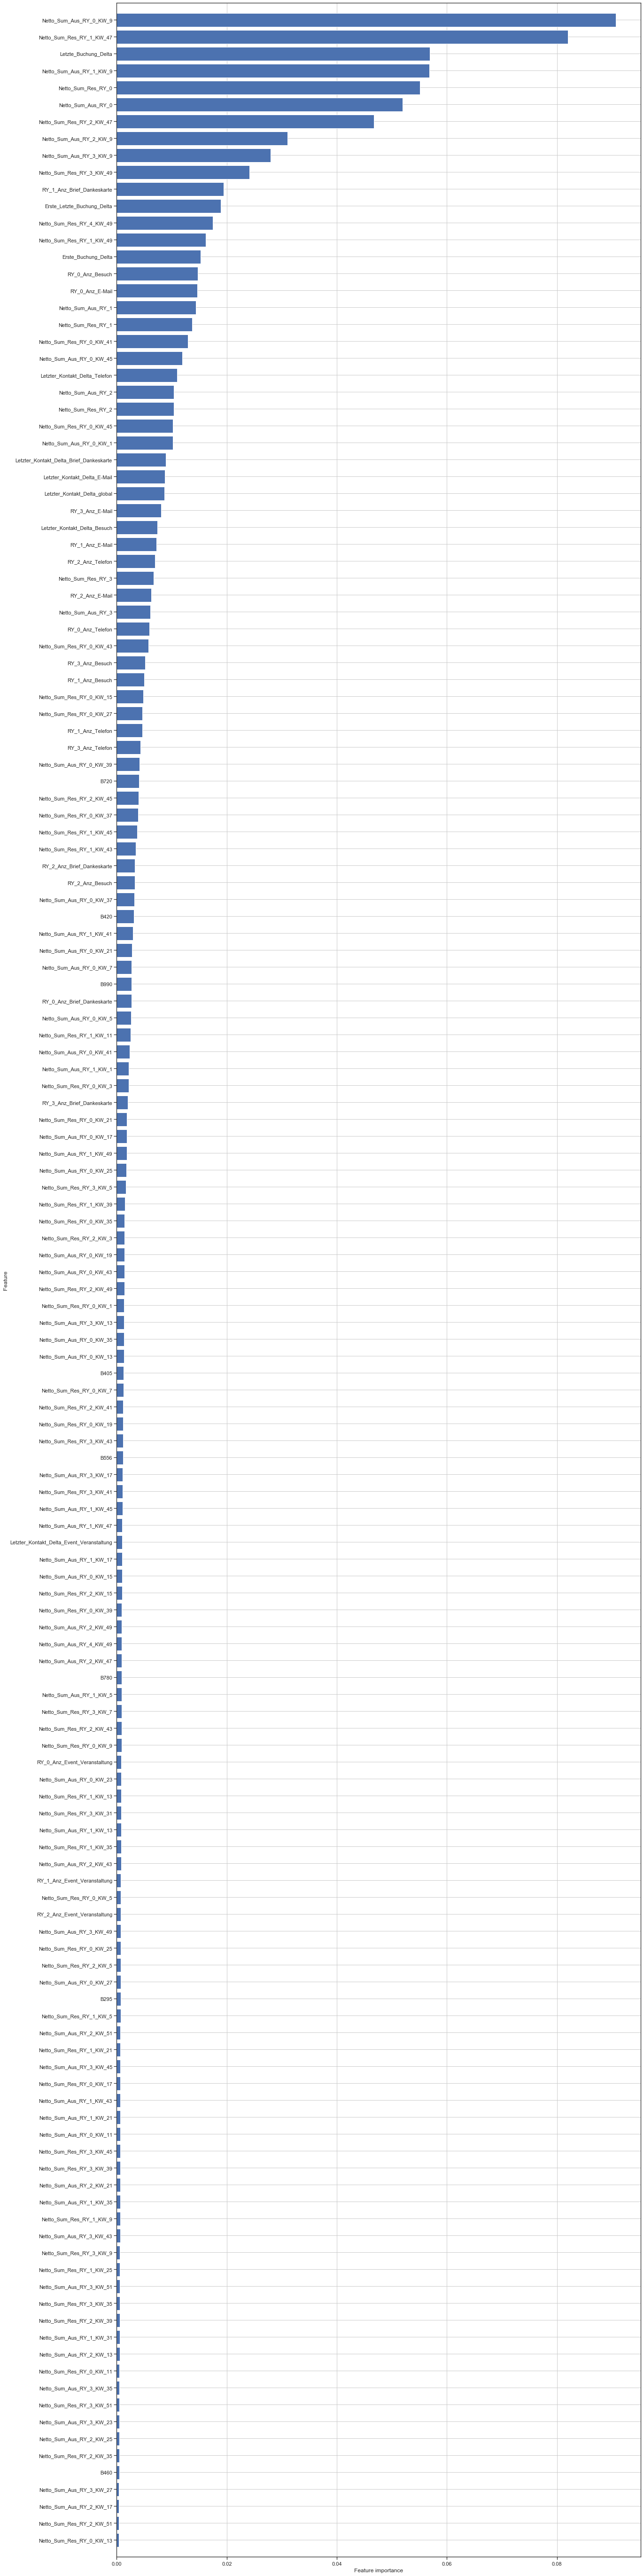

In [81]:
plot_feature_importances(forest_01,feature_columns)

# Model Validation

## Confusion Matrix

In [82]:
from sklearn.metrics import confusion_matrix

In [86]:
%%time

def confusion_matrices(X_test,y_test):
    global pred_forest_01, pred_logreg_C0001, pred_logreg_C1000
    
    pred_forest_01    = forest_01.predict(X_test)
    pred_logreg_C0001 = logreg_C0001.predict(X_test)
    pred_logreg_C1000 = logreg_C1000.predict(X_test)


    # Wall time: 20.9ms

    confusion_logreg_C0001 = (
        confusion_matrix(
            y_test,
            pred_logreg_C0001
            )
        )
    
    df_confusion_logreg_C0001 = (
        pd.DataFrame(
            confusion_logreg_C0001,
            index   = ["Fact 0", "Fact 1"],
            columns = ["Pred 0", "Pred 1"]
            )
        )
    
    confusion_logreg_C1000 = (
        confusion_matrix(
            y_test,
            pred_logreg_C1000
            )
        )
    
    df_confusion_logreg_C1000 = (
        pd.DataFrame(
            confusion_logreg_C1000,
            index   = ["Fact 0", "Fact 1"],
            columns = ["Pred 0", "Pred 1"]
            )
        )

    confusion_forest_01 = (
        confusion_matrix(
            y_test,
            pred_forest_01
            )
        )
    
    df_confusion_forest_01 = (
        pd.DataFrame(
            confusion_forest_01,
            index=["Fact 0", "Fact 1"],
            columns=["Pred 0","Pred 1"]
            )
        )

    print("Test set balance:")
    print(pd.Series(y_test).value_counts())

    print("\nConfusion Matrices:")

    print("\nRandom Forest (forest_01):")
    display(df_confusion_forest_01)

    print("\nLogistic Regression C=0.001:")
    display(df_confusion_logreg_C0001)

    print("\nLogistic Regression C=1000:")
    display(df_confusion_logreg_C1000)

Wall time: 0 ns


In [87]:
confusion_matrices(
    X_test = X_train_balanced,
    y_test = y_train_balanced
    )

Test set balance:
True     13395
False    13395
dtype: int64

Confusion Matrices:

Random Forest (forest_01):


,Pred 0,Pred 1
Fact 0,13332,63
Fact 1,470,12925



Logistic Regression C=0.001:


,Pred 0,Pred 1
Fact 0,11777,1618
Fact 1,4447,8948



Logistic Regression C=1000:


,Pred 0,Pred 1
Fact 0,11704,1691
Fact 1,2747,10648


In [88]:
confusion_matrices(
    X_test = X_train,
    y_test = y_train
    )

Test set balance:
False    13395
True       477
dtype: int64

Confusion Matrices:

Random Forest (forest_01):


,Pred 0,Pred 1
Fact 0,13332,63
Fact 1,149,328



Logistic Regression C=0.001:


,Pred 0,Pred 1
Fact 0,11777,1618
Fact 1,139,338



Logistic Regression C=1000:


,Pred 0,Pred 1
Fact 0,11704,1691
Fact 1,113,364


In [89]:
confusion_matrices(
    X_test = X_test,
    y_test = y_test
    )

Test set balance:
False    4465
True      159
dtype: int64

Confusion Matrices:

Random Forest (forest_01):


,Pred 0,Pred 1
Fact 0,4407,58
Fact 1,103,56



Logistic Regression C=0.001:


,Pred 0,Pred 1
Fact 0,3940,525
Fact 1,55,104



Logistic Regression C=1000:


,Pred 0,Pred 1
Fact 0,3869,596
Fact 1,59,100


1. $Precision =\frac{TP}{TP+FP}$
2. $Recall =\frac{TP}{TP+FN}$ <-- Optimising target!
3. $f_{1} = 2 \cdot \frac{precision \cdot recall}{precision + recall} = \frac{2 \cdot TP}{2 \cdot TP + (FN + FP)}$
4. $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$ KPI combines Precision and Recall


## Classification Report

In [90]:
from sklearn.metrics import classification_report

In [92]:
%%time
## Wall time: 9.94ms

print("\n")
print("Logistic Regression C=0.001:")
print(
    classification_report(
        y_test,
        pred_logreg_C0001,
        target_names=["not booking = 0", "booking = 1"]
        )
    )

print("Logistic Regression C=1000:")
print(
    classification_report(
        y_test,
        pred_logreg_C1000,
        target_names=["not booking = 0", "booking = 1"]
        )
    )

print("Random Forest:")
print(
    classification_report(
        y_test,
        pred_forest_01,
        target_names=["not booking = 0", "booking = 1"]
        )
    )



Logistic Regression C=0.001:
                 precision    recall  f1-score   support

not booking = 0       0.99      0.88      0.93      4465
    booking = 1       0.17      0.65      0.26       159

       accuracy                           0.87      4624
      macro avg       0.58      0.77      0.60      4624
   weighted avg       0.96      0.87      0.91      4624

Logistic Regression C=1000:
                 precision    recall  f1-score   support

not booking = 0       0.98      0.87      0.92      4465
    booking = 1       0.14      0.63      0.23       159

       accuracy                           0.86      4624
      macro avg       0.56      0.75      0.58      4624
   weighted avg       0.96      0.86      0.90      4624

Random Forest:
                 precision    recall  f1-score   support

not booking = 0       0.98      0.99      0.98      4465
    booking = 1       0.49      0.35      0.41       159

       accuracy                           0.97      4624
      

## Precision-Recall Curve

In [97]:
from sklearn.metrics import precision_recall_curve

def prec_rec_values(X_test,y_test):
    global precision_forest_01,    recall_forest_01,    thresholds_forest_01
    global precision_logreg_C0001, recall_logreg_C0001, thresholds_logreg_C0001
    global precision_logreg_C1000, recall_logreg_C1000, thresholds_logreg_C1000 
    
    
    # LogReg C=0.001
    (precision_logreg_C0001, recall_logreg_C0001, thresholds_logreg_C0001) = (
        precision_recall_curve(
            y_test, 
            logreg_C0001.predict_proba(X_test)[:,1]
            )
        )
    
    
    # LogReg C=1000
    (precision_logreg_C1000, recall_logreg_C1000, thresholds_logreg_C1000) = (
        precision_recall_curve(
            y_test, 
            logreg_C1000.predict_proba(X_test)[:,1]
            )
        )
    
    
    # RandomForestClassifier has predict_proba, but not decision_function
    (precision_forest_01, recall_forest_01, thresholds_forest_01) = (
        precision_recall_curve(
            y_test,
            forest_01.predict_proba(X_test)[:, 1]
            )
        )
    
    

In [99]:
%%time
# Wall time: 22.4s

def prec_rec_curve(X_train,y_train):
    prec_rec_values(X_train,y_train)

    plt.figure(figsize=(15,12))
    plt.grid()

    def optimum_point(precision_forest_01,
                      recall_forest_01,
                      thresholds_forest_01,
                      name,
                      dot):
        
        optimum_idx = (
            pd.Series.idxmin(
                np.power(1-pd.Series(precision_forest_01),2)
                + np.power(1-pd.Series(recall_forest_01),2)
                )
            )
        
        return plt.plot(precision_forest_01[optimum_idx],
                     recall_forest_01[optimum_idx],
                     dot,
                     markersize = 10,
                     label      = f"{name}: threshold {thresholds_forest_01[optimum_idx]}",
                     fillstyle  = "none",
                     c          = 'k',
                     mew        = 2
                     )

    
    ## Apply optium_point():
    
    # Optimum: Forest 
    optimum_point(precision_forest_01,
                  recall_forest_01,
                  thresholds_forest_01,
                  name="forest_01",
                  dot='o'
                 )
    
    # Optimum: LogReg C = 0.001
    optimum_point(precision_logreg_C0001,
                  recall_logreg_C0001,
                  thresholds_logreg_C0001,
                  name="logreg_C0001",
                  dot='x'
                 )
    
    # Optimum: LogReg C = 1000
    optimum_point(precision_logreg_C1000,
                  recall_logreg_C1000,
                  thresholds_logreg_C1000,
                  name="logreg_C1000",
                  dot='+'
                 )
    
    # Prec-Rec Curve: LogReg C = 0.001
    plt.plot(precision_logreg_C0001,
             recall_logreg_C0001,
             label="Logistic Regression, C=0.001"
            )
    
    # Prec-Rec Curve: LogReg C = 1000
    plt.plot(precision_logreg_C1000,
             recall_logreg_C1000,
             label="Logistic Regression, C=1000"
            )
    
    # Prec-Rec Curve: Forest
    plt.plot(precision_forest_01,
             recall_forest_01,
             label="Random Forest"
            )

    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.legend(loc="best")

    plt.show()

Wall time: 0 ns


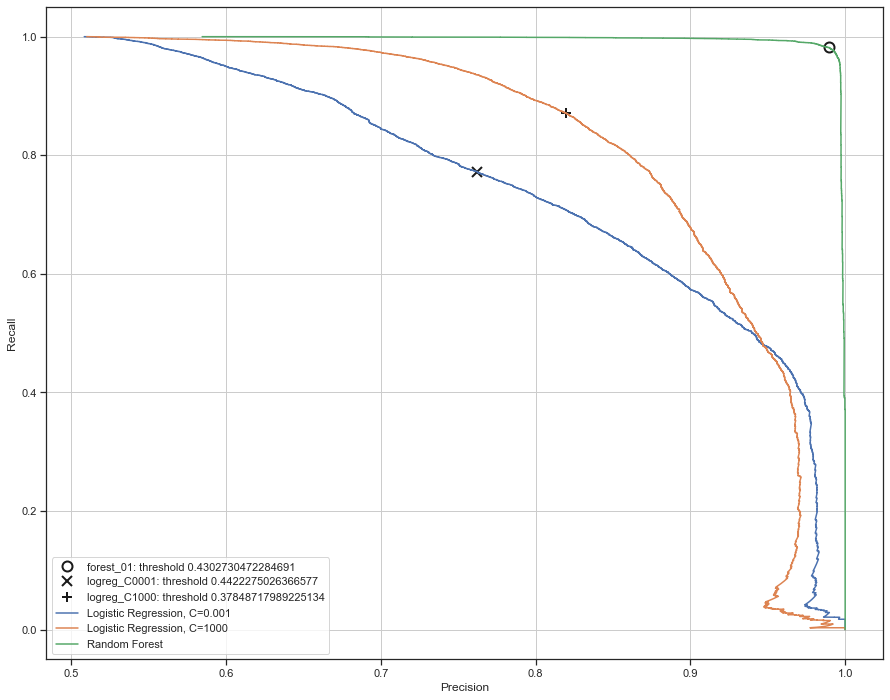

In [100]:
prec_rec_curve(
    X_train = X_train_balanced,
    y_train = y_train_balanced
    )

=> Should give very nice curves, because models have been trained on this data.

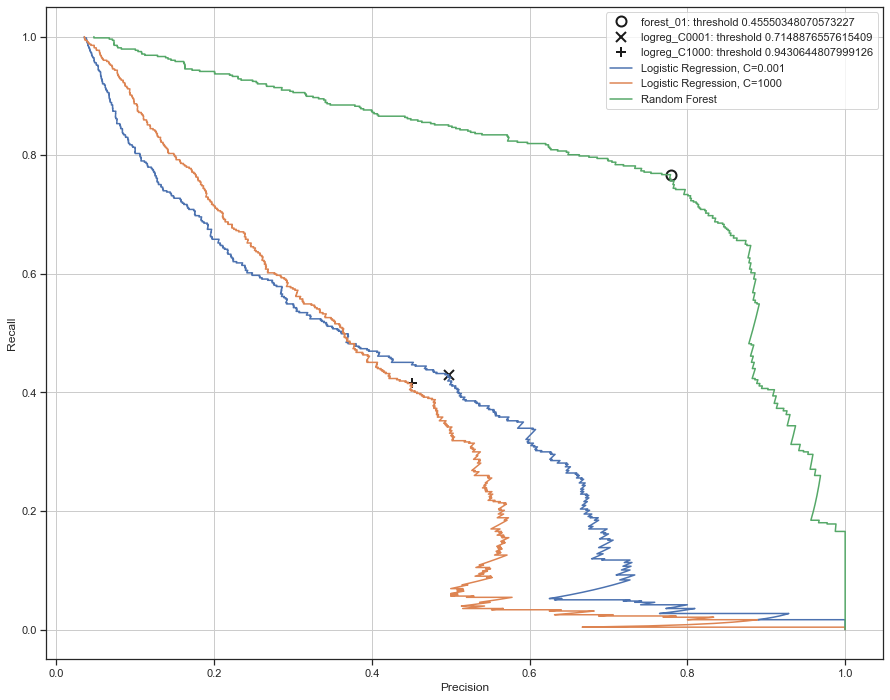

In [101]:
prec_rec_curve(
    X_train = X_train,
    y_train = y_train
    )

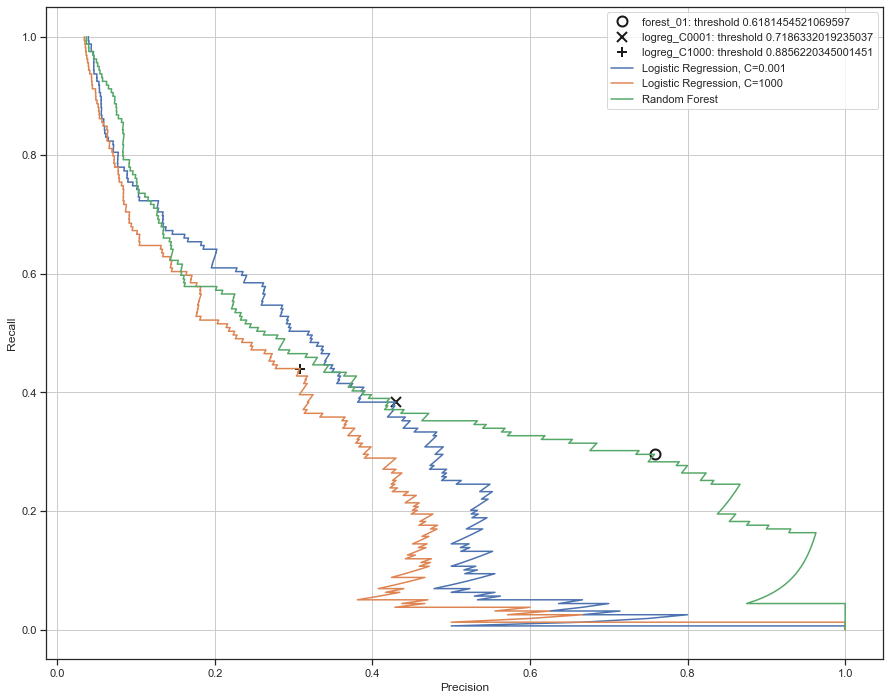

In [102]:
prec_rec_curve(
    X_train = X_test,
    y_train = y_test
    )

In [103]:
%%time
#Wall time: 19.7 s

# Area under the Recall/Precision-curves:
from sklearn.metrics import average_precision_score 

avg_precision_logreg_C0001 = (
    average_precision_score(
        y_test,
        logreg_C0001.predict_proba(X_test)[:, 1]
        )
    )

avg_precision_logreg_C1000 = (
    average_precision_score(
        y_test,
        logreg_C1000.predict_proba(X_test)[:, 1]
        )
    )

avg_precision_forest_01 = (
    average_precision_score(
        y_test,
        forest_01.predict_proba(X_test)[:, 1]
        )
    )


print(f"Average Precision of LogReg C=0.001: {avg_precision_logreg_C0001}")
print(f"Average Precision of LogReg C=1000:  {avg_precision_logreg_C1000}")
print(f"Average Precision of forest_01:      {avg_precision_forest_01}")

Average Precision of LogReg C=0.001: 0.313816692647095
Average Precision of LogReg C=1000:  0.25851504937018455
Average Precision of forest_01:      0.41563563514693147
Wall time: 1.52 s


=> Winner: Forest

## Receiver Operating Characteristics (ROC) and AUC


In [104]:
%%time
from sklearn.metrics import roc_curve
def roc_curve_graph(X_test,y_test):
    global fpr_logreg_C0001, tpr_logreg_C0001, thresholds_logreg_C0001
    global fpr_logreg_C1000, tpr_logreg_C1000, thresholds_logreg_C1000
    global fpr_forest_01, tpr_forest_01, thresholds_forest_01
    
    (fpr_logreg_C0001, tpr_logreg_C0001, thresholds_logreg_C0001) = (
        roc_curve(
            y_test,
            logreg_C0001.predict_proba(X_test)[:, 1]
            )
        )
    
    
    (fpr_logreg_C1000, tpr_logreg_C1000, thresholds_logreg_C1000) = (
        roc_curve(
            y_test,
            logreg_C1000.predict_proba(X_test)[:, 1]
            )
        )
    
    (fpr_forest_01, tpr_forest_01, thresholds_forest_01) = (
        roc_curve(
            y_test,
            forest_01.predict_proba(X_test)[:, 1]
            )
        )

    def threshold_dot_50perc(fpr_forest_01,
                             tpr_forest_01,
                             thresholds_forest_01,
                             name,
                             dot):

        close_default_index_forest_01 = (
            pd.Series.idxmin(
                np.power(1-pd.Series(tpr_forest_01),2)
                +np.power(pd.Series(fpr_forest_01),2)
                )
            )
        
        return plt.plot(
            fpr_forest_01[close_default_index_forest_01],
            tpr_forest_01[close_default_index_forest_01],
            dot,
            markersize=10,
            label=f"{name} threshold: {thresholds_forest_01[close_default_index_forest_01]}",
            fillstyle="none",
            c='k',
            mew=2)


    plt.figure(figsize=(15,12))
    plt.grid()

    plt.plot(fpr_forest_01,
             fpr_forest_01,
             linestyle='dotted',
             label="base line"
            )

    plt.plot(fpr_logreg_C0001,
             tpr_logreg_C0001,
             label="logreg_C0001"
            )
    
    plt.plot(fpr_logreg_C1000,
             tpr_logreg_C1000,
             label="logreg_C1000"
            )
    
    plt.plot(fpr_forest_01,
             tpr_forest_01,
             label="forest_01"
            )


    plt.xlabel("False-Postive Rate (FPR)")
    plt.ylabel("True-Positive Rate (TPR) aka. Recall")

    # find threshold closest to zero
    threshold_dot_50perc(fpr_forest_01,
                         tpr_forest_01,
                         thresholds_forest_01,
                         'forest_01',
                         dot='^'
                        )
    
    threshold_dot_50perc(fpr_logreg_C0001,
                         tpr_logreg_C0001,
                         thresholds_logreg_C0001,
                         'logreg_C0001',
                         dot='x'
                        )
    
    threshold_dot_50perc(fpr_logreg_C1000,
                         tpr_logreg_C1000,
                         thresholds_logreg_C1000,
                         'logreg_C1000',
                         dot='+'
                        )

    plt.legend(loc=4)
    plt.show()

Wall time: 0 ns


In [105]:
%%time
# Wall time: 17.6s
from sklearn.metrics import roc_auc_score

def roc_auc(X_test,y_test):
    forest_01_auc = roc_auc_score(
        y_test,
        forest_01.predict_proba(X_test)[:, 1]
        )
    
    logreg_C0001_auc = roc_auc_score(
        y_test,
        logreg_C0001.predict_proba(X_test)[:, 1]
        )
    
    logreg_C1000_auc = roc_auc_score(
        y_test,
        logreg_C1000.predict_proba(X_test)[:, 1]
        )


    print("AUC for forest_01:    {:.3f}".format(forest_01_auc))
    print("AUC for logreg_C0001: {:.3f}".format(logreg_C0001_auc))
    print("AUC for logreg_C1000: {:.3f}".format(logreg_C1000_auc))

Wall time: 0 ns


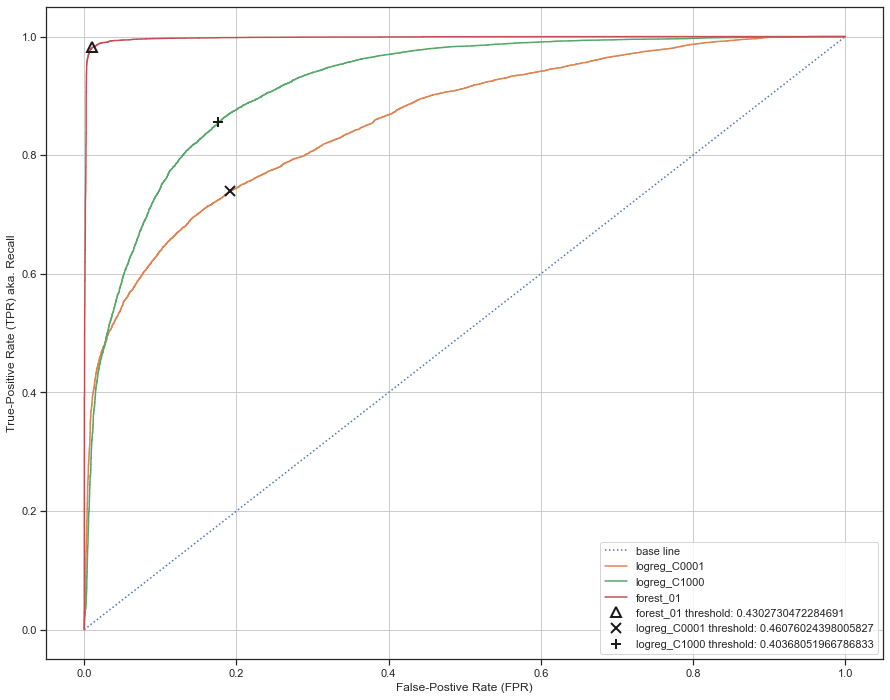

AUC for forest_01:    0.998
AUC for logreg_C0001: 0.858
AUC for logreg_C1000: 0.919
Wall time: 4.32 s


In [106]:
%%time
#Wall time: 10.6 s
roc_curve_graph(X_train_balanced,
                y_train_balanced
               )

roc_auc(X_train_balanced,
        y_train_balanced
       )

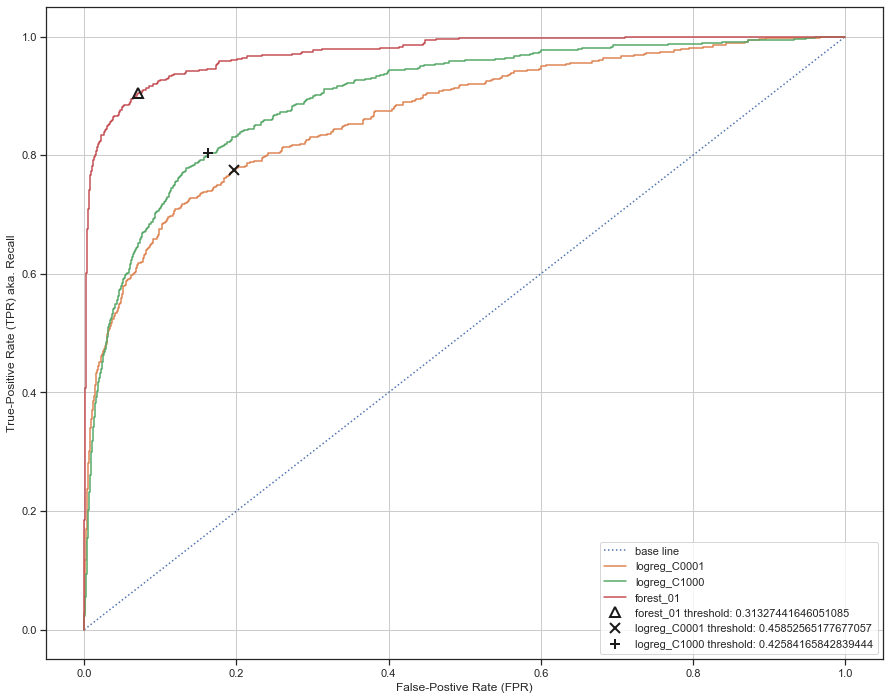

AUC for forest_01:    0.973
AUC for logreg_C0001: 0.866
AUC for logreg_C1000: 0.897
Wall time: 3.67 s


In [107]:
%%time
#Wall time: 10.6 s
roc_curve_graph(X_train,
                y_train
               )

roc_auc(X_train,
        y_train
       )

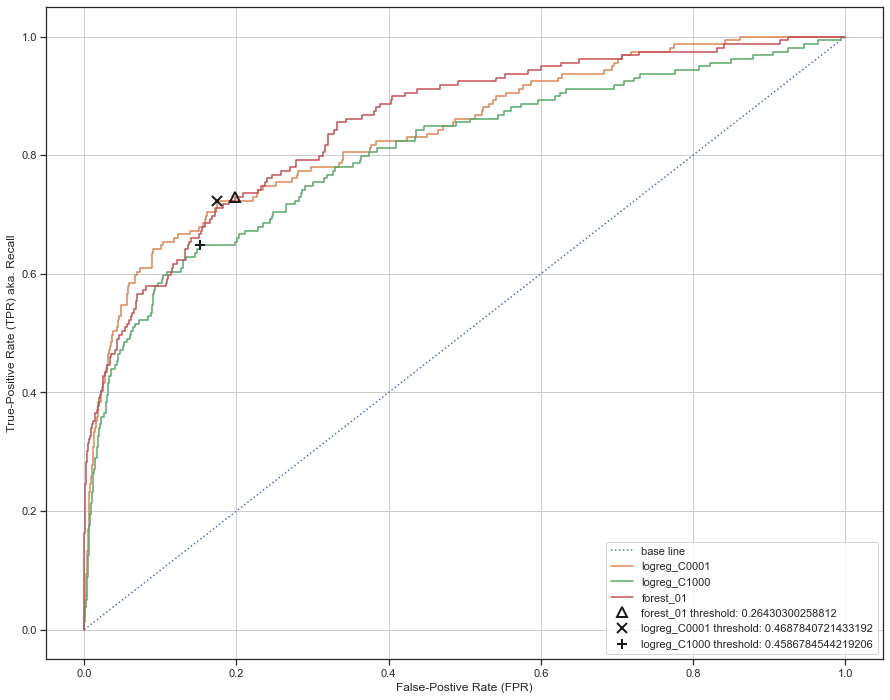

AUC for forest_01:    0.851
AUC for logreg_C0001: 0.836
AUC for logreg_C1000: 0.804
Wall time: 3.03 s


In [108]:
%%time
roc_curve_graph(X_test,
                y_test
               )

roc_auc(X_test,
        y_test
       )

# Scoring

## Score Class Probabilities (Booking: No/Yes)

In [109]:
scoring_prob     = forest_01.predict_proba(X_scoring)

scoring_prob_df  = pd.DataFrame(scoring_prob,
                                columns=["Prob_0","Prob_1"]
                               )

scoring_all_prob = (pd.merge(scoring_all,
                             scoring_prob_df,
                             left_index=True,
                             right_index=True
                            ).sort_values("Prob_1",ascending=False)
                   )

In [111]:
scoring_all_prob.head(4)

,Endkunde_NR,Kampagne_Erfass_Datum_min,Kampagne_Erfass_Datum_max,Erste_Buchung_Delta,Letzte_Buchung_Delta,Erste_Letzte_Buchung_Delta,Netto_Sum_Aus_RY_0_KW_1,Netto_Sum_Aus_RY_0_KW_11,Netto_Sum_Aus_RY_0_KW_13,Netto_Sum_Aus_RY_0_KW_15,Netto_Sum_Aus_RY_0_KW_17,Netto_Sum_Aus_RY_0_KW_19,Netto_Sum_Aus_RY_0_KW_21,Netto_Sum_Aus_RY_0_KW_23,Netto_Sum_Aus_RY_0_KW_25,Netto_Sum_Aus_RY_0_KW_27,Netto_Sum_Aus_RY_0_KW_29,Netto_Sum_Aus_RY_0_KW_3,Netto_Sum_Aus_RY_0_KW_31,Netto_Sum_Aus_RY_0_KW_33,Netto_Sum_Aus_RY_0_KW_35,Netto_Sum_Aus_RY_0_KW_37,Netto_Sum_Aus_RY_0_KW_39,Netto_Sum_Aus_RY_0_KW_41,Netto_Sum_Aus_RY_0_KW_43,Netto_Sum_Aus_RY_0_KW_45,Netto_Sum_Aus_RY_0_KW_5,Netto_Sum_Aus_RY_0_KW_7,Netto_Sum_Aus_RY_0_KW_9,Netto_Sum_Aus_RY_1_KW_1,Netto_Sum_Aus_RY_1_KW_11,Netto_Sum_Aus_RY_1_KW_13,Netto_Sum_Aus_RY_1_KW_15,Netto_Sum_Aus_RY_1_KW_17,Netto_Sum_Aus_RY_1_KW_19,Netto_Sum_Aus_RY_1_KW_21,Netto_Sum_Aus_RY_1_KW_23,Netto_Sum_Aus_RY_1_KW_25,Netto_Sum_Aus_RY_1_KW_27,Netto_Sum_Aus_RY_1_KW_29,Netto_Sum_Aus_RY_1_KW_3,Netto_Sum_Aus_RY_1_KW_31,Netto_Sum_Aus_RY_1_KW_33,Netto_Sum_Aus_RY_1_KW_35,Netto_Sum_Aus_RY_1_KW_37,Netto_Sum_Aus_RY_1_KW_39,Netto_Sum_Aus_RY_1_KW_41,Netto_Sum_Aus_RY_1_KW_43,Netto_Sum_Aus_RY_1_KW_45,Netto_Sum_Aus_RY_1_KW_47,Netto_Sum_Aus_RY_1_KW_49,Netto_Sum_Aus_RY_1_KW_5,Netto_Sum_Aus_RY_1_KW_51,Netto_Sum_Aus_RY_1_KW_7,Netto_Sum_Aus_RY_1_KW_9,Netto_Sum_Aus_RY_2_KW_1,Netto_Sum_Aus_RY_2_KW_11,Netto_Sum_Aus_RY_2_KW_13,Netto_Sum_Aus_RY_2_KW_15,Netto_Sum_Aus_RY_2_KW_17,Netto_Sum_Aus_RY_2_KW_19,Netto_Sum_Aus_RY_2_KW_21,Netto_Sum_Aus_RY_2_KW_23,Netto_Sum_Aus_RY_2_KW_25,Netto_Sum_Aus_RY_2_KW_27,Netto_Sum_Aus_RY_2_KW_29,Netto_Sum_Aus_RY_2_KW_3,Netto_Sum_Aus_RY_2_KW_31,Netto_Sum_Aus_RY_2_KW_33,Netto_Sum_Aus_RY_2_KW_35,Netto_Sum_Aus_RY_2_KW_37,Netto_Sum_Aus_RY_2_KW_39,Netto_Sum_Aus_RY_2_KW_41,Netto_Sum_Aus_RY_2_KW_43,Netto_Sum_Aus_RY_2_KW_45,Netto_Sum_Aus_RY_2_KW_47,Netto_Sum_Aus_RY_2_KW_49,Netto_Sum_Aus_RY_2_KW_5,Netto_Sum_Aus_RY_2_KW_51,Netto_Sum_Aus_RY_2_KW_7,Netto_Sum_Aus_RY_2_KW_9,Netto_Sum_Aus_RY_3_KW_1,Netto_Sum_Aus_RY_3_KW_11,Netto_Sum_Aus_RY_3_KW_13,Netto_Sum_Aus_RY_3_KW_15,Netto_Sum_Aus_RY_3_KW_17,Netto_Sum_Aus_RY_3_KW_19,Netto_Sum_Aus_RY_3_KW_21,Netto_Sum_Aus_RY_3_KW_23,Netto_Sum_Aus_RY_3_KW_25,Netto_Sum_Aus_RY_3_KW_27,Netto_Sum_Aus_RY_3_KW_29,Netto_Sum_Aus_RY_3_KW_3,Netto_Sum_Aus_RY_3_KW_31,Netto_Sum_Aus_RY_3_KW_33,Netto_Sum_Aus_RY_3_KW_35,Netto_Sum_Aus_RY_3_KW_37,Netto_Sum_Aus_RY_3_KW_39,Netto_Sum_Aus_RY_3_KW_41,Netto_Sum_Aus_RY_3_KW_43,Netto_Sum_Aus_RY_3_KW_45,Netto_Sum_Aus_RY_3_KW_47,Netto_Sum_Aus_RY_3_KW_49,Netto_Sum_Aus_RY_3_KW_5,Netto_Sum_Aus_RY_3_KW_51,Netto_Sum_Aus_RY_3_KW_7,Netto_Sum_Aus_RY_3_KW_9,Netto_Sum_Aus_RY_4_KW_47,Netto_Sum_Aus_RY_4_KW_49,Netto_Sum_Aus_RY_4_KW_51,Netto_Sum_Res_RY_0_KW_1,Netto_Sum_Res_RY_0_KW_11,Netto_Sum_Res_RY_0_KW_13,Netto_Sum_Res_RY_0_KW_15,Netto_Sum_Res_RY_0_KW_17,Netto_Sum_Res_RY_0_KW_19,Netto_Sum_Res_RY_0_KW_21,Netto_Sum_Res_RY_0_KW_23,Netto_Sum_Res_RY_0_KW_25,Netto_Sum_Res_RY_0_KW_27,Netto_Sum_Res_RY_0_KW_29,Netto_Sum_Res_RY_0_KW_3,Netto_Sum_Res_RY_0_KW_31,Netto_Sum_Res_RY_0_KW_33,Netto_Sum_Res_RY_0_KW_35,Netto_Sum_Res_RY_0_KW_37,Netto_Sum_Res_RY_0_KW_39,Netto_Sum_Res_RY_0_KW_41,Netto_Sum_Res_RY_0_KW_43,Netto_Sum_Res_RY_0_KW_45,Netto_Sum_Res_RY_0_KW_5,Netto_Sum_Res_RY_0_KW_7,Netto_Sum_Res_RY_0_KW_9,Netto_Sum_Res_RY_1_KW_1,Netto_Sum_Res_RY_1_KW_11,Netto_Sum_Res_RY_1_KW_13,Netto_Sum_Res_RY_1_KW_15,Netto_Sum_Res_RY_1_KW_17,Netto_Sum_Res_RY_1_KW_19,Netto_Sum_Res_RY_1_KW_21,Netto_Sum_Res_RY_1_KW_23,Netto_Sum_Res_RY_1_KW_25,Netto_Sum_Res_RY_1_KW_27,Netto_Sum_Res_RY_1_KW_29,Netto_Sum_Res_RY_1_KW_3,Netto_Sum_Res_RY_1_KW_31,Netto_Sum_Res_RY_1_KW_33,Netto_Sum_Res_RY_1_KW_35,Netto_Sum_Res_RY_1_KW_37,Netto_Sum_Res_RY_1_KW_39,Netto_Sum_Res_RY_1_KW_41,Netto_Sum_Res_RY_1_KW_43,Netto_Sum_Res_RY_1_KW_45,Netto_Sum_Res_RY_1_KW_47,Netto_Sum_Res_RY_1_KW_49,Netto_Sum_Res_RY_1_KW_5,Netto_Sum_Res_RY_1_KW_51,Netto_Sum_Res_RY_1_KW_7,Netto_Sum_Res_RY_1_KW_9,Netto_Sum_Res_RY_2_KW_1,Netto_Sum_Res_RY_2_KW_11,Netto_Sum_Res_RY_2_KW_1

## Backup for comparision with Rscript

In [113]:
backup_scorings_df =  scoring_all_prob.loc[:,["Endkunde_NR","Prob_1"]]

with project_dir("vkprog\\predictions"):
    store_bin(backup_scorings_df, "20191118_pred_rebuild_with_sales_filter.feather")


17:24:58 [INFO] Started storing binary file
17:24:58 [INFO] Writing to file C:\Users\stc\data\vkprog\predictions\20191118_pred_rebuild_with_sales_filter.feather
17:24:58 [INFO] Written 432.8 KB
17:24:58 [INFO] Finished storing binary file in 0.01s (0.02s CPU)


## Adding additional information for delivery lists ``EK_LIST_2W_KOMPLETT.csv``

In [114]:
from pa_lib.file import load_bin

In [115]:
ek_info = load_bin("vkprog\\ek_info.feather")

17:25:22 [INFO] Started loading binary file
17:25:22 [INFO] Reading from file C:\Users\stc\data\vkprog\ek_info.feather
17:25:22 [INFO] Finished loading binary file in 0.04s (0.03s CPU)


In [116]:
ek_list_raw = pd.merge(scoring_all_prob,ek_info,on="Endkunde_NR", how="left")

In [117]:
ek_list_raw.shape

(18450, 385)

In [143]:
# Check _col_selection_ in file "vp2xlsx.py". 
# It's the only one that actually counts! 
# Compare with R-code to figure out the meaning.

net_columns = [col for col in ek_info.columns if col.startswith("Net_")]

col_row_filter =([
    "Insolvenz",
    #"Last_Res_Date",  # covered in listing
    #"Last_Aus_Date",  # covered in listing
    "last_CRM_Ktkt_date",
    "VB_FILTER_VON",
    "VB_FILTER_BIS"
    ])

listing = (
    ["Endkunde_NR",      # Endkunde_NR
     "Endkunde",         # Endkunde
     "EK_HB_Apg_Kurzz",  # HB_APG (based on R-script)
     "Agentur",          # Agentur
     "AG_Hauptbetreuer", # HB_Agentur   
     "PLZ",              # PLZ
     "GEMEINDE"]        # Ort
    
     +net_columns       # Net_2015, Net_2016, Net_2017, Net_2018, Net_2019 
    
     +["letzte_VBs",     # (bd, aggregiert)
       "Letzter_Kontakt", # KZ_letzter_Ktkt (crm)
       "Kanal",           #(crm)
       "Betreff",         #(crm)    
       "Last_Res_Date", # Letzte_Kamp_erfasst
       "Last_Aus_Date", # letzte_Kamp_Beginn
       "VERKAUFS_GEBIETS_CODE", # Verkaufsgebiet
       "VB_VKGEB",      
       "Prob_1"        # prob_KW (from here, good good.)
       ]
    # Needed for row_filter
    + col_row_filter
    )

ek_list = (ek_list_raw
    .loc[:,listing]
    .rename(columns={
        "EK_HB_Apg_Kurzz": "HB_APG",
        "AG_Hauptbetreuer": "HB_Agentur",
        "GEMEINDE": "Ort",
        "Letzter_Kontakt": "letzter_Kontakt",
        "Last_Res_Date": "letzte_Kamp_erfasst",
        "Last_Aus_Date":"letzte_Kamp_Beginn",
        "VERKAUFS_GEBIETS_CODE": "Verkaufsgebiet",
        "VB_VKGEB": "VB_VK_Geb",
        "Prob_1": "prob_KW"
    })       
    )

print(f"ek_list.shape: {ek_list.shape}")

ek_list.shape: (18450, 25)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [144]:
ek_list.sample(10)

,Endkunde_NR,Endkunde,HB_APG,Agentur,HB_Agentur,PLZ,Ort,Net_2015,Net_2016,Net_2017,Net_2018,Net_2019,letzte_VBs,letzter_Kontakt,Kanal,Betreff,letzte_Kamp_erfasst,letzte_Kamp_Beginn,Verkaufsgebiet,VB_VK_Geb,prob_KW,Insolvenz,last_CRM_Ktkt_date,VB_FILTER_VON,VB_FILTER_BIS
13579,164083,Pernod Ricard Swiss SA,CGA,Mediatonic SA,BEG,8304,Wallisellen,0.0,105931.0,0.0,0.0,0.0,NaN,SIB,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2016-12-08,2017-02-20,V-Z01,,0.170055,None,2019-10-27,NaT,NaT
10048,661063,BEFEX AG,MOE,None,None,8820,Wädenswil,0.0,0.0,0.0,0.0,8400.0,NaN,JAC,E-Mail,Offerte APG | Befex AG | ÖV Werbung,2019-11-06,2020-03-01,V-Z02,,0.248657,None,2019-11-07,NaT,NaT
12941,570356,Liaudet-Pial SA,SAO,None,None,1020,Renens VD,2300.0,2300.0,2300.0,2300.0,2300.0,NaN,SAO,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2019-09-01,2019-12-01,V-W02,SAO,0.183730,None,2019-10-25,NaT,NaT
1619,568294,Die Helmut Förnbacher Theater Company,RPO,None,None,4103,Bottmingen,0.0,0.0,0.0,1335.0,0.0,NaN,ROF,E-Mail,Mitte - Aktionen 2019 - ROF | 50% City ePanels...,2018-12-06,2018-12-17,V-M01,RPO,0.424420,None,2019-02-27,NaT,NaT
12622,642669,"Jungschar Majakka, Schwarzenburg",JAN,None,None,3604,Thun,0.0,0.0,0.0,84.0,0.0,NaN,CJA,E-Mail,Verkauf Bern Mitte 2019 - Dispoeröffnung 2020 ...,2018-04-25,2018-05-05,V-M05,JAN,0.191630,None,2019-09-24,NaT,NaT
3557,590523,Hefti & Domke Holzbau GmbH,None,None,None,3781,Turbach,2500.0,2500.0,0.0,0.0,0.0,NaN,CJA,E-Mail,Verkauf Bern Mitte 2019 - Dispoeröffnung 2020 ...,2016-09-01,2016-12-01,V-M05,JAN,0.363765,None,2019-09-24,NaT,NaT
1703,538623,Promoco Developpement SA,SIB,Promoco Developpement SA,SIB,1227,Carouge GE,4800.0,0.0,9930.0,11028.0,10440.0,NaN,SIB,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2019-07-05,2019-08-12,V-W01,SIB,0.420451,None,2019-10-27,NaT,NaT
354,106374,Tissot SA,ROE,Outdoor Media AG,NYI,2400,Le Locle,673038.0,552324.0,744693.0,515561.0,1787235.0,NaN,ROE,E-Mail,"Tissot SA, Le Locle - Verlängerungen oder Demo...",2019-11-07,2020-05-04,V-W04,VIT,0.575474,None,2019-10-29,NaT,NaT
1887,126705,Choeur de Pontverre,SIB,None,None,1251,Gy,735.0,0.0,0.0,0.0,0.0,NaN,SIB,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2015-11-04,2016-03-07,V-W02,SAO,0.412369,None,2019-10-26,NaT,NaT
1641,471732,St. Galler Festspiele,REM,freicom st. gallen ag,ERS,9004,St. Gallen,195606.0,0.0,199975.0,880.0,106173.0,NaN,REM,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2019-05-03,2019-06-24,V-O04,REM,0.422967,None,2019-10-26,NaT,NaT


In [145]:
desc_col(ek_list)

,DTYPE,NULLS,UNIQUE
Endkunde_NR,int64,0/18450,18450
Endkunde,object,0/18450,17613
HB_APG,object,472/17978,62
Agentur,object,11870/6580,2127
HB_Agentur,object,11956/6494,93
PLZ,int64,0/18450,2328
Ort,object,10/18440,2320
Net_2015,float64,4/18446,4344
Net_2016,float64,4/18446,5129
Net_2017,float64,4/18446,5133


## Deployment for ``vp2xlsx.py``

In [146]:
with project_dir("vkprog\\predictions"):
    store_bin(ek_list, "20191118_ek_list.feather")

09:33:35 [INFO] Started storing binary file
09:33:35 [INFO] Writing to file C:\Users\stc\data\vkprog\predictions\20191118_ek_list.feather
09:33:35 [INFO] Written 4.6 MB
09:33:35 [INFO] Finished storing binary file in 0.03s (0.03s CPU)


## Pauschale Filterkriterien (muss rüber ins vp2xlsx.py)

In [120]:
net_columns = [col for col in ek_info.columns if col.startswith("Net_")] # Net_2015, ..., Net_2019
pauschale_filter = (
    # Insolvenz:
    (ek_info.loc[:,"Insolvenz"] 
         != True
    ) &
    
    # kuerzlich_gebucht (in den letzten 2 Monaten erfasste Kampagnen):
    (ek_info.loc[:,"Last_Res_Date"] 
        < pd.Timestamp.now() - pd.DateOffset(months=2)
    ) &
    
    # kuerzlich_im_aushang (Aushangbeginn vor 1 Monat oder später):
    (ek_info.loc[:,"Last_Aus_Date"] 
        < pd.Timestamp.now() - pd.DateOffset(months=1)
    ) &
    
    # keine Kleinkunden (Ueber die letzten 4 Jahre nie mehr als 3'000 pro Jahr):
    (ek_info.loc[:,net_columns].max(axis=1).fillna(0) 
        > 3000
    ) &
    
    # keine Neukunden (Alle, die erst im aktuellen Jahr Umsatz hatten):
    ((ek_info.loc[:,sorted(net_columns, reverse=True)[1:]]
             .max(axis=1)
             .fillna(0))
        > 0
    ) &
    
    # Umsatz_erreicht (80% Netto-Umsatz gem. Vorjahr erreicht) 
    ((ek_info.loc[:,sorted(net_columns, reverse=True)[0]]
             .fillna(0))
         <= 0.8*(ek_info.loc[:,sorted(net_columns, reverse=True)[1]]
                        .fillna(0))
    ) &
    
    # kuerzlich_im_kontakt (keine Kunden, mit CRM-Kontakt in den letzten 4 Wochen)
    (ek_info.loc[:,"last_CRM_Ktkt_date"].fillna(pd.Timestamp.now() - pd.DateOffset(years=100)) 
        < pd.Timestamp.now() - pd.DateOffset(months=1)
    ) &
    
    # VB_FILTER_AKTIV (in CRM ist eine gültige Sperre für Kunden erfasst)
     ~(# We define the evil ones, and take the boolean opposite:
    
         # Both entries exist: Customer is right now within "Sperre"
        ((ek_info.loc[:,"VB_FILTER_VON"] < pd.Timestamp.now()) &
         (pd.Timestamp.now() <= ek_info.loc[:,"VB_FILTER_BIS"]))

        |# No end date, but begin date exists: 
        ((ek_info.loc[:,"VB_FILTER_VON"] < pd.Timestamp.now()) &
         (ek_info.loc[:,"VB_FILTER_BIS"].isna() ))

        |# No begin date, but end date exists:
        (ek_info.loc[:,"VB_FILTER_VON"].isna() & 
         (ek_info.loc[:,"VB_FILTER_BIS"] <= pd.Timestamp.now() )) 
      )
    
    )

In [121]:
ek_list_pauschale_filter = ek_list.loc[pauschale_filter,:]
ek_list_pauschale_filter.shape

(1381, 27)

In [122]:
ek_list_pauschale_filter.sample(20)

,Endkunde_NR,Endkunde,HB_APG,Agentur,HB_Agentur,PLZ,Ort,Net_2015,Net_2016,Net_2017,Net_2018,Net_2019,letzte_VBs,letzter_Kontakt,Kanal,Betreff,letzte_Kamp_erfasst,letzte_Kamp_Beginn,Verkaufsgebiet,VB_VK_Geb,prob_KW,Insolvenz,letzte_Kamp_erfasst,letzte_Kamp_Beginn,last_CRM_Ktkt_date,VB_FILTER_VON,VB_FILTER_BIS
7399,104222,Fruitcake Werbung + Presse AG,CBA,Fruitcake Werbung & Presse AG,JAN,3076,Worb,448.0,0.0,0.0,0.0,0.0,NaN,CBA,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2015-11-25,2016-01-04,V-M05,JAN,0.299386,None,2015-11-25,2016-01-04,2019-10-26,NaT,NaT
3875,497265,Sommeroper Selzach,SAE,c&h konzepte werbeagentur ag,TEM,2545,Selzach,0.0,9987.0,0.0,0.0,0.0,NaN,AST,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2016-05-13,2016-07-18,V-M03,RIN,0.357224,None,2016-05-13,2016-07-18,2019-10-26,NaT,NaT
3356,469699,Outdoor Trading AG,CGA,ACE 2 ACE outdoor media ag,BAM,8005,Zürich,26183.0,0.0,0.0,0.0,0.0,NaN,IWI,E-Mail,Ost - Aktionen - 2018 - CGA_Kunden_Dispoeröffn...,2015-10-28,2015-11-23,V-Z01,,0.367981,None,2015-10-28,2015-11-23,2018-09-11,NaT,NaT
1776,595543,Malux SA,None,None,None,6904,Lugano 4 Molino Nuovo,500.0,0.0,0.0,0.0,0.0,NaN,ADA,E-Mail,SUD - Aktionen - 2017 - PMI Primavera - TRA,2015-09-16,2015-12-01,V-S02,TRA,0.417318,True,2015-09-16,2015-12-01,2017-02-16,NaT,NaT
7013,496069,ERNE AG Holzbau,CKT,None,None,4332,Stein AG,5000.0,5000.0,5000.0,0.0,0.0,NaN,CKT,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2017-09-01,2017-12-01,V-M02,CKT,0.305399,None,2017-09-01,2017-12-01,2019-10-25,NaT,NaT
4508,621408,Fricker Christina,ACO,None,None,8413,Neftenbach,0.0,194.0,0.0,0.0,0.0,NaN,None,None,None,2016-08-10,2016-09-12,V-O02,CGA,0.345268,None,2016-08-10,2016-09-12,NaT,NaT,NaT
10137,632173,Andreas Graf Immobilien GmbH,SFA,Creacom Verena Huber,MOE,8180,Bülach,0.0,0.0,3910.0,0.0,3644.0,NaN,HKL,E-Mail,Graf Immobilien,2019-07-12,2019-08-26,V-O04,REM,0.246770,None,2019-07-12,2019-08-26,2018-10-29,NaT,NaT
11612,604144,RED FOX International AG,BON,None,None,7504,Pontresina,762.0,684.0,2900.0,0.0,312.0,NaN,GBE,E-Mail,RedFox: Bestätigung 1017226 Plakate Bahnhof Po...,2019-10-24,2019-12-30,V-SO01,,0.212602,None,2019-10-24,2019-12-30,2019-11-04,NaT,NaT
8866,634627,Escape Quest AG Luzern,OSS,None,None,6014,Luzern,0.0,0.0,1314.0,1478.0,0.0,NaN,OSS,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2018-02-26,2018-03-26,V-M08,,0.275220,None,2018-02-26,2018-03-26,2019-10-25,NaT,NaT
4761,656549,Valexpérience.com Sàrl,PIE,None,None,3960,Sierre,0.0,0.0,0.0,0.0,1231.0,NaN,CRE,E-Mail,AW: Platzieren der F200 Plakate: Campagne Walla,2019-07-10,2019-09-02,None,None,0.340938,None,2019-07-10,2019-09-02,2019-07-31,NaT,NaT


## Cutoff: Selecting the customers with the highest chances for a sale

In [137]:
print("Expectation Management: \nThat's how many last year made reservations in these calendar weeks:")
(training_all
    .groupby("Target_Res_flg")
    .agg({"Endkunde_NR": "count"})
    )

Expectation Management: 
That's how many last year made reservations in these calendar weeks:


,Endkunde_NR
Target_Res_flg,
False,17860
True,636


Check the distribution to define a reasonable cut-off:

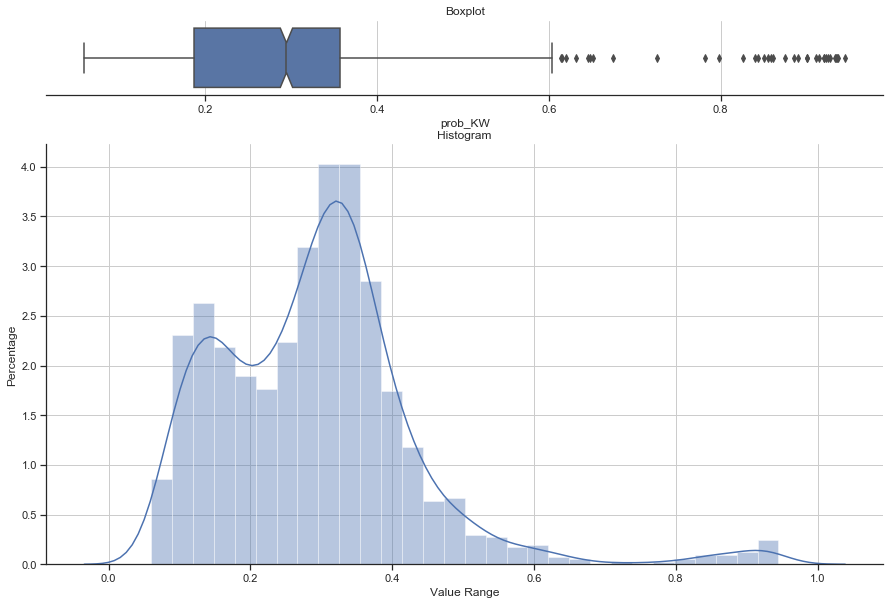

count    1381.000000
mean        0.292181
std         0.141751
min         0.059782
25%         0.187421
50%         0.294952
75%         0.357246
max         0.944895
Name: prob_KW, dtype: float64

In [125]:
boxplot_histogram(ek_list_pauschale_filter.loc[:,"prob_KW"])

(ek_list_pauschale_filter
    .loc[:,"prob_KW"]
    .describe()
    )


In [126]:
def cutoff_by_quantile(dataframe, quantile=0.25):
    """
    Input: 
        - Dataframe with Probabilities for a reservation
        - Quantile
    
    Output:
        - Subset of initial dataframe cutoff via defined Quantile
    """
    quantile_75      = dataframe.prob_KW.quantile([quantile]).iloc[0]
    filter_col       = (dataframe.loc[:,"prob_KW"] > quantile_75)
    dataframe_cutoff = dataframe.loc[filter_col,:]
    print(f"Dataset: {dataframe_cutoff.shape[0]} out of {dataframe.shape[0]} selected")
    print(f"Cutoff:  {quantile_75} (minimum predicted probability for a reservation)")
    return dataframe_cutoff

In [127]:
ek_list_cutoff = cutoff_by_quantile(
    dataframe = ek_list_pauschale_filter,
    quantile = 0.25
    )

Dataset: 1035 out of 1381 selected
Cutoff:  0.18742121061214326 (minimum predicted probability for a reservation)


In [128]:
ek_list_cutoff.head()

,Endkunde_NR,Endkunde,HB_APG,Agentur,HB_Agentur,PLZ,Ort,Net_2015,Net_2016,Net_2017,Net_2018,Net_2019,letzte_VBs,letzter_Kontakt,Kanal,Betreff,letzte_Kamp_erfasst,letzte_Kamp_Beginn,Verkaufsgebiet,VB_VK_Geb,prob_KW,Insolvenz,letzte_Kamp_erfasst,letzte_Kamp_Beginn,last_CRM_Ktkt_date,VB_FILTER_VON,VB_FILTER_BIS
20,149931,Ofenland,PAL,None,None,5034,Suhr,12713.0,3200.0,10266.0,4861.0,3344.0,NaN,MAL,E-Mail,Verkauf Zentral & Nord - Buchungseröffnung 1. ...,2019-03-01,2019-04-01,V-M06,OSS,0.944895,None,2019-03-01,2019-04-01,2019-09-16,NaT,NaT
37,540970,Vu d'ailleurs Opticien,SIB,None,None,1222,Vésenaz,2600.0,2600.0,2600.0,2600.0,0.0,NaN,SIB,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2018-12-01,2019-03-04,V-W01,SIB,0.936276,None,2018-12-01,2019-03-04,2019-10-26,NaT,NaT
38,542197,Naturgärtner.ch,SFA,None,None,8200,Schaffhausen,3500.0,3500.0,3500.0,3500.0,0.0,NaN,SFA,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2018-12-01,2019-03-01,V-O04,REM,0.935624,None,2018-12-01,2019-03-01,2019-10-26,NaT,NaT
41,587153,Scherrer Verwaltungs AG,ROK,None,None,9527,Niederhelfenschwil,5500.0,5500.0,5500.0,5500.0,0.0,NaN,ROK,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2018-12-01,2019-03-01,V-O01,MOE,0.934388,None,2018-12-01,2019-03-01,2019-10-27,NaT,NaT
47,165216,Moretti Malergeschäft,SFA,None,None,8242,Hofen SH,2000.0,2000.0,2000.0,2000.0,0.0,NaN,None,None,None,2018-12-01,2019-03-01,V-O04,REM,0.932784,None,2018-12-01,2019-03-01,NaT,NaT,NaT


# Appendix

## Mutual Information

In [129]:
%%time
mu_in = (mutual_info_classif(X_train_balanced,y_train_balanced) / mutual_info_classif(y_train_balanced.reshape(-1,1),y_train_balanced))

Wall time: 25.5 s


In [130]:
print(mu_in.shape)
print(feature_columns.shape)

(150,)
(150,)


In [132]:
 mu_in_df = (
     pd.DataFrame(
         {'Feature':           feature_columns,
          'Mutual_Information': mu_in}
         )
     .sort_values(by        = 'Mutual_Information',
                  ascending = False
                 )
     .reset_index(drop=True)
     )

In [133]:
display(mu_in_df.head(50))

,Feature,Mutual_Information
0,RY_0_Anz_E-Mail,0.645727
1,RY_1_Anz_E-Mail,0.579861
2,RY_2_Anz_E-Mail,0.565976
3,Letzter_Kontakt_Delta_global,0.564152
4,Letzter_Kontakt_Delta_E-Mail,0.537354
5,Erste_Buchung_Delta,0.519480
6,RY_3_Anz_E-Mail,0.509658
7,Erste_Letzte_Buchung_Delta,0.506106
8,Netto_Sum_Res_RY_0,0.321832
9,Letzte_Buchung_Delta,0.314560


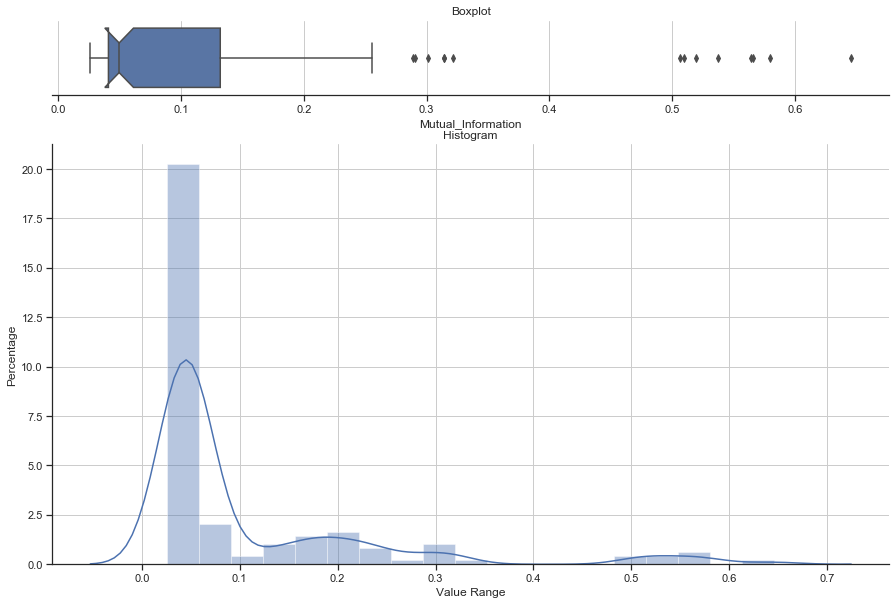

In [134]:
boxplot_histogram(mu_in_df.loc[:,'Mutual_Information'])

In [135]:
def mu_in_cutoff(cutoff):
    display(mu_in_df.loc[mu_in_df.loc[:,'Mutual_Information'] >= cutoff,:])

In [136]:
mu_in_cutoff(0.07)

,Feature,Mutual_Information
0,RY_0_Anz_E-Mail,0.645727
1,RY_1_Anz_E-Mail,0.579861
2,RY_2_Anz_E-Mail,0.565976
3,Letzter_Kontakt_Delta_global,0.564152
4,Letzter_Kontakt_Delta_E-Mail,0.537354
5,Erste_Buchung_Delta,0.519480
6,RY_3_Anz_E-Mail,0.509658
7,Erste_Letzte_Buchung_Delta,0.506106
8,Netto_Sum_Res_RY_0,0.321832
9,Letzte_Buchung_Delta,0.314560


In [ ]:
mu_in_df['scaled'] = mu_in_df['Mutual_Information'] / mu_in_df['Mutual_Information'].sum()

In [ ]:
mu_in_df['cum'] = mu_in_df['scaled'].cumsum()

In [ ]:
plt.figure(figsize=(15,50))
sns.barplot(x   = 'Mutual_Information',
            y   = 'Feature',
            data= mu_in_df)

## Univariate Analysis

In [ ]:
for feature in feature_columns:
    print(feature)
    print(len(training_all.loc[training_all.loc[:,feature] > 0, feature]))
    boxplot_histogram(training_all.loc[training_all.loc[:,feature] > 0, feature])

## Bivariate Analysis

In [ ]:
training_all.describe()

In [ ]:
print(training_all.columns)

In [ ]:
def hexbin(dataset, first_feature,second_feature,gridsize=25):
    dataset.plot.hexbin(x=first_feature, y=second_feature , gridsize=gridsize, figsize=(12,8))

In [ ]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=10, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(training_all,
                      hue="Target_Res_flg",
                      col="Target_Res_flg",
                      height=10
                     )

g.map(hexbin,
      "Netto_Sum_Aus_RY_0_KW_1",
      "Erste_Buchung_Delta",
      extent=[0, 1, 0, 1]
     )

In [ ]:
%%time
sns.axes_style("darkgrid")

sns.pairplot(data   = training_all.loc[:,["Target_Res_flg"]+list(mu_in_df.head(20).loc[:,"Feature"])],
             diag_kind="kde",
             hue    = "Target_Res_flg",
             height =5
            ).savefig("derp.png")
